In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import smogn
import gym
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.io as pio
import metallurgy
pio.renderers.default = "plotly_mimetype+notebook"
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ss=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\steel_strength(now).csv", sep=',', encoding='unicode_escape') ## encoding='unicode_escape'
ss.shape

(312, 17)

In [3]:
ss['fe'] = 100 - ss[['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']].sum(axis=1)
print(ss)

                                               formula     c    mn    si  \
0    Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...  0.02  0.05  0.05   
1    Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....  0.18  0.01  0.01   
2    Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....  0.00  0.01  0.01   
3    Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...  0.01  0.05  0.05   
4    Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...  0.01  0.05  0.05   
..                                                 ...   ...   ...   ...   
307  Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...  0.38  0.18  0.01   
308  Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....  0.00  0.06  0.05   
309  Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...  0.37  0.17  0.01   
310  Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...  0.41  0.19  0.01   
311  Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0....  0.27  0.27  0.01   

        cr     ni    mo     v     n    nb     co     w    al    ti  \
0     0.01  19.70

In [4]:
col = ss.pop('fe')
ss.insert(1,col.name,col)

In [5]:
ss.head()

,formula,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [6]:
ss = ss.fillna(0)
ss.head(313)

,formula,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,0.0
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...,82.48,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00,1722.5,1998.1,5.0
308,Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....,81.19,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09,1019.0,1019.0,19.0
309,Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...,81.53,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00,1860.3,2156.6,3.0
310,Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...,85.57,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00,1812.1,2087.7,2.0


In [7]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   formula           312 non-null    object 
 1   fe                312 non-null    float64
 2   c                 312 non-null    float64
 3   mn                312 non-null    float64
 4   si                312 non-null    float64
 5   cr                312 non-null    float64
 6   ni                312 non-null    float64
 7   mo                312 non-null    float64
 8   v                 312 non-null    float64
 9   n                 312 non-null    float64
 10  nb                312 non-null    float64
 11  co                312 non-null    float64
 12  w                 312 non-null    float64
 13  al                312 non-null    float64
 14  ti                312 non-null    float64
 15  yield strength    312 non-null    float64
 16  tensile strength  312 non-null    float64
 1

In [8]:
ss.columns

Index(['formula', 'fe', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb',
       'co', 'w', 'al', 'ti', 'yield strength', 'tensile strength',
       'elongation'],
      dtype='object')

<Axes: >

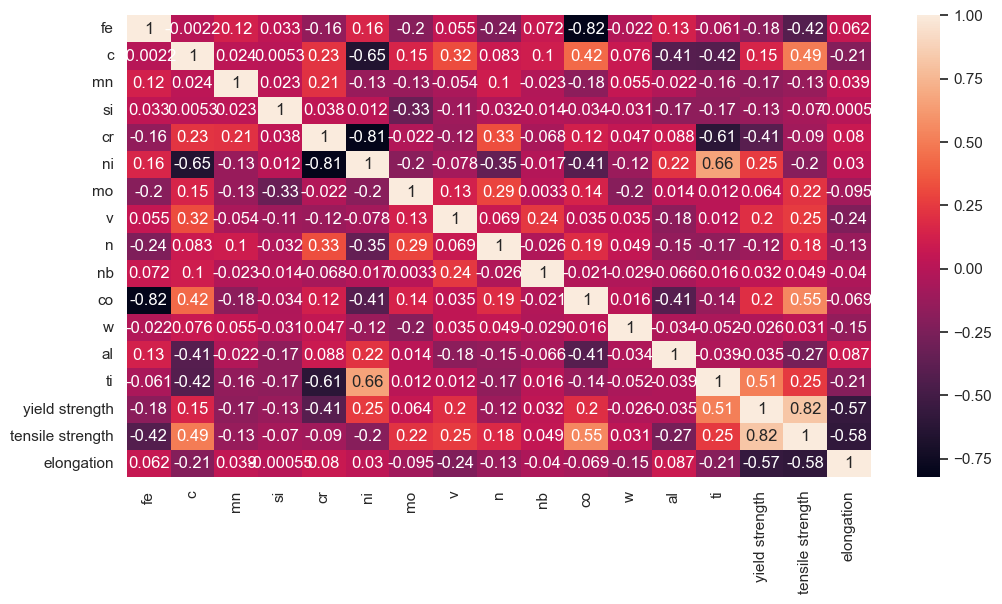

In [9]:
ssd=ss.drop(['formula'], axis=1)
plt.figure(figsize=(12,6))
sns.heatmap(ssd.corr(), annot=True)

In [10]:
## Data Ready For Train Test Split
X = ssd.drop((['tensile strength','yield strength','elongation']),axis=1)
y = ssd["yield strength"].to_numpy()
X.shape

(312, 14)

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train-test split for model evaluation
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=50)

# Standardizing data
sc = StandardScaler()
sc.fit(X_train_raw)
X_train = sc.transform(X_train_raw)
X_test = sc.transform(X_test_raw)

print('Data Shape= ', X.shape[0])

## Regression Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Data Shape=  312


In [12]:
## Adaboost Regressor 

from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor(n_estimators=1000) ## n_estimator =1 :One feature two leaf    
ada.fit(X_train,y_train)
y_pred_ada= ada.predict(X_test)
print("Adaboost Regressor")
print('MSE     =',mean_squared_error(y_test,y_pred_ada))
print('MAE     =',mean_absolute_error(y_test,y_pred_ada))
print('R2score =',r2_score(y_test,y_pred_ada))

Adaboost Regressor
MSE     = 26986.72082558858
MAE     = 126.17446324645968
R2score = 0.7315305888310608


In [13]:
## Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor(n_estimators= 1000,max_depth=4,learning_rate=0.1)
gbc.fit(X_train,y_train)
y_pred_gbc= gbc.predict(X_test)
print("Gradient Boosting  Regressor")
print('MSE     =',mean_squared_error(y_test,y_pred_gbc))
print('MAE     =',mean_absolute_error(y_test,y_pred_gbc))
print('R2score =',r2_score(y_test,y_pred_gbc))

Gradient Boosting  Regressor
MSE     = 20092.83272368358
MAE     = 99.41489629706838
R2score = 0.8001123958369746


In [14]:
## Decision Trees Regressor
## We dont need scaling in decision trees

from sklearn.tree import DecisionTreeRegressor
dtc= DecisionTreeRegressor()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
print("Decision Trees  Regressor")
print('MSE     =',mean_squared_error(y_test,y_pred_dtc))
print('MAE     =',mean_absolute_error(y_test,y_pred_dtc))
print('R2score =',r2_score(y_test,y_pred_dtc))

Decision Trees  Regressor
MSE     = 45243.244519230764
MAE     = 132.27403846153845
R2score = 0.5499109619893839


In [15]:
# Extreme Gradient Boosting Regressor
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb= xgb.predict(X_test)

## Performing Accuracy Test of Model
print("XGBoost Regressor")
print('MSE     =',mean_squared_error(y_test,y_pred_xgb))
print('MAE     =',mean_absolute_error(y_test,y_pred_xgb))
print('R2score =',r2_score(y_test,y_pred_xgb))

XGBoost Regressor
MSE     = 26611.937827991842
MAE     = 108.93810683030348
R2score = 0.7352590066455558


In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


Random Forest Regressor
MSE     = 20624.320337807705
MAE     = 104.87225000000007
R2score = 0.794825048488267


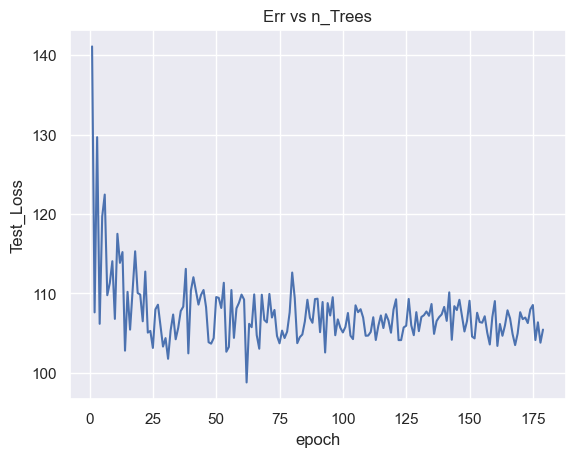

In [18]:
# RandomForest Regressor

from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=50,bootstrap=True,max_features="sqrt")
rfc.fit(X_train,y_train)
y_pred_rfc= rfc.predict(X_test)
print("Random Forest Regressor")
print('MSE     =',mean_squared_error(y_test,y_pred_rfc))
print('MAE     =',mean_absolute_error(y_test,y_pred_rfc))
print('R2score =',r2_score(y_test,y_pred_rfc))

## Random Forest Classifier : Calculating n_estimators for minimum Error (MAE)
errorlist =[]
for i in range(1,180):
    rfc_est= RandomForestRegressor(n_estimators=i,bootstrap=True,max_features="sqrt")
    rfc_est.fit(X_train,y_train)
    y_pred_est= rfc_est.predict(X_test)
    err= mean_absolute_error(y_pred_est , y_test)
    errorlist.append(err)
plt.plot(range(1,180),errorlist)
plt.title("Err vs n_Trees")
plt.xlabel('epoch')
plt.ylabel('Test_Loss')
##  To zoom in
##  plt.ylim(0.05,0.15)
##  plt.xlim(0,25)

plt.show()

In [19]:
## Lasso Regression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
# Lasso with 5 fold cross-validation
las= LassoCV(cv=5, random_state=50, max_iter=10000)
las.fit(X_train, y_train)
# Set best alpha
lasso = Lasso(alpha=las.alpha_)
lasso.fit(X_train, y_train)
y_pred_las= lasso.predict(X_test)
print("Lasso Regressor")
print('MSE     =',mean_squared_error(y_test,y_pred_las))
print('MAE     =',mean_absolute_error(y_test,y_pred_las))
print('R2score =',r2_score(y_test,y_pred_las))

Lasso Regressor
MSE     = 57301.077138576926
MAE     = 174.45105998629586
R2score = 0.42995718011974515


## Neural Network

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [21]:
## Data Ready For Train Test Split
Xnn = ssd.drop((['tensile strength','yield strength','elongation']),axis=1)
ynn = ssd["yield strength"].to_numpy()
print('Data Shape= ',Xnn.shape)

X_train_raw, X_test_raw, y_trainn, y_testn = train_test_split(Xnn, ynn,
                                            test_size=0.1,random_state=0)

# Standardizing data
sc = StandardScaler()
sc.fit(X_train_raw)
X_train = sc.transform(X_train_raw)
X_test = sc.transform(X_test_raw)

# Pre-processing for Neural Networks
# Convert to 2D PyTorch tensors
X_train_nn = torch.tensor(X_train, dtype=torch.float32)
y_train_nn = torch.tensor(y_trainn, dtype=torch.float32).reshape(-1, 1)
X_test_nn = torch.tensor(X_test, dtype=torch.float32)
y_test_nn = torch.tensor(y_testn, dtype=torch.float32).reshape(-1, 1)


Data Shape=  (312, 14)


In [22]:
class HardnessModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layerstack = nn.Sequential(
            nn.Linear(in_features=14, out_features=100),
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=200),
            nn.ReLU(),
            nn.Linear(in_features=200, out_features=400),
            nn.ReLU(),
            #nn.Linear(in_features=300, out_features=400),
            #nn.ReLU(),
            nn.Linear(in_features=400, out_features=500),
            nn.ReLU(),
            nn.Linear(in_features=500, out_features=600),
            nn.ReLU(),
            nn.Linear(in_features=600, out_features=700),
            nn.ReLU(),
            nn.Linear(in_features=700, out_features=800),
            nn.ReLU(),
            nn.Linear(in_features=800, out_features=700),
            nn.ReLU(),
            nn.Linear(in_features=700, out_features=800),
            nn.ReLU(),
            nn.Linear(in_features=800, out_features=700),
            nn.ReLU(),
            nn.Linear(in_features=700, out_features=600),
            nn.ReLU(),
            nn.Linear(in_features=600, out_features=500),
            nn.ReLU(),
            nn.Linear(in_features=500, out_features=400),
            nn.ReLU(),
            nn.Linear(in_features=400, out_features=200),
            nn.ReLU(),
            nn.Linear(in_features=200, out_features=500),
            nn.ReLU(),
            nn.Linear(in_features=500, out_features=200),
            nn.ReLU(),
            nn.Linear(in_features=200, out_features=100),
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=1)
        )

    def forward(self, x):
        return self.layerstack(x)


In [23]:
modl = HardnessModel()

lossfn = nn.L1Loss()
optimizer = optim.Adam(modl.parameters(), lr=0.00001)


epoch: 0 | Train Loss: 1428.4908 | Test Loss (MAE): 1354.6533
epoch: 1000 | Train Loss: 104.6178 | Test Loss (MAE): 113.4714
epoch: 2000 | Train Loss: 56.6350 | Test Loss (MAE): 89.5076
epoch: 3000 | Train Loss: 42.6579 | Test Loss (MAE): 82.8761
epoch: 4000 | Train Loss: 36.9551 | Test Loss (MAE): 79.1323
epoch: 5000 | Train Loss: 32.8594 | Test Loss (MAE): 78.8698
epoch: 6000 | Train Loss: 30.1701 | Test Loss (MAE): 77.9307
epoch: 7000 | Train Loss: 27.9073 | Test Loss (MAE): 78.1138
epoch: 8000 | Train Loss: 25.9184 | Test Loss (MAE): 77.2603
epoch: 9000 | Train Loss: 24.1527 | Test Loss (MAE): 76.9715
epoch: 10000 | Train Loss: 23.7628 | Test Loss (MAE): 77.5668
epoch: 11000 | Train Loss: 22.0260 | Test Loss (MAE): 76.8794
epoch: 12000 | Train Loss: 20.5440 | Test Loss (MAE): 77.7364
epoch: 13000 | Train Loss: 20.1296 | Test Loss (MAE): 77.7892
epoch: 14000 | Train Loss: 21.6928 | Test Loss (MAE): 78.7188
epoch: 15000 | Train Loss: 18.8295 | Test Loss (MAE): 78.4096
epoch: 16000 | 

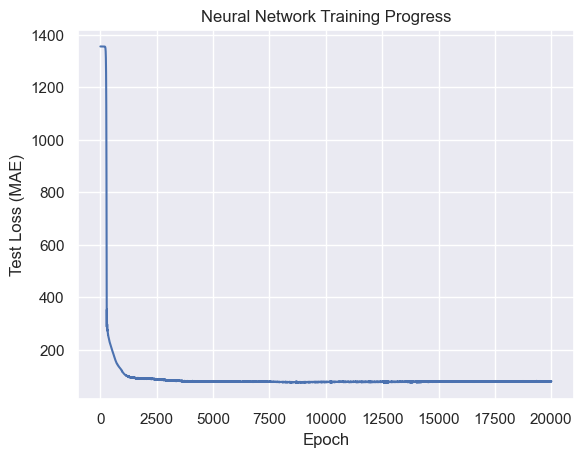

Neural Network R2 score = 0.8770012933401473


In [24]:
torch.manual_seed(0)
torch.cuda.manual_seed(0)

datalist1 = []
epochs = 20001

for epoch in range(epochs):
    modl.train()
    ypred = modl(X_train_nn)
    loss = lossfn(ypred, y_train_nn)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluation on test set
    modl.eval()
    with torch.no_grad():
        testpred = modl(X_test_nn)
        testloss = lossfn(testpred, y_test_nn)
        datalist1.append(testloss.item())
    
    if epoch % 1000 == 0:
        print(f"epoch: {epoch} | Train Loss: {loss.item():.4f} | Test Loss (MAE): {testloss.item():.4f}")

torch.save(modl.state_dict(), 'hardness_model.pth')

# Optionally save the plot
# plt.savefig('HardnessPredNN.png')

# Load the model for evaluation
# Initialize the model
modl_loaded = HardnessModel()

# Load the saved state dictionary
modl_loaded.load_state_dict(torch.load('hardness_model.pth'))

# Set the model to evaluation mode
modl_loaded.eval()

# Plot test loss over epochs
plt.figure()
plt.plot(range(len(datalist1)), datalist1)
plt.xlabel('Epoch')
plt.ylabel('Test Loss (MAE)')
plt.title('Neural Network Training Progress')
plt.show()

# Optionally save the plot
# plt.savefig('HardnessPredNN.png')

# Evaluation metric (R2 score)
nnloss = r2_score(y_test_nn, testpred)
print("Neural Network R2 score =", nnloss)


In [25]:
modl_loaded.load_state_dict(torch.load('hardness_model.pth'))

<All keys matched successfully>

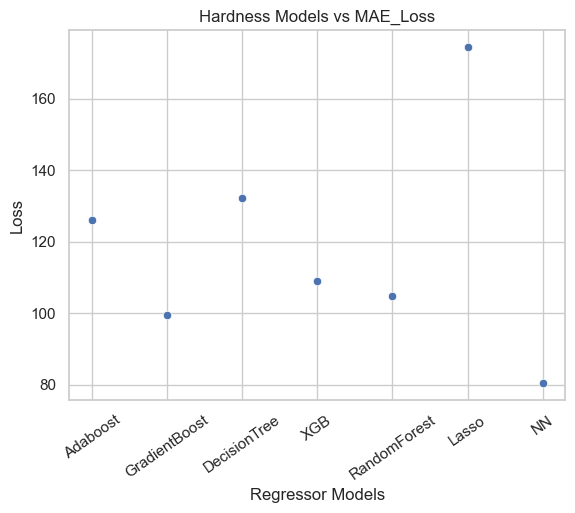

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

acc_ada= mean_absolute_error(y_pred_ada , y_test)   ## Adaboosting  Regressor
acc_gbc= mean_absolute_error(y_pred_gbc , y_test)   ## Gradient Boosting Regressor
acc_dtc= mean_absolute_error(y_pred_dtc , y_test)   ## Decision Trees  Regressor
acc_xgb= mean_absolute_error(y_pred_xgb , y_test)   ## Extreme Gradient Boosting Regressor
acc_rfc= mean_absolute_error(y_pred_rfc , y_test)   ## Random Forest Regressor
acc_las= mean_absolute_error(y_pred_las , y_test)   ## Random Forest Regressor
Loss = ["Adaboost","GradientBoost","DecisionTree","XGB","RandomForest","Lasso","NN"]
Lossscore= [acc_ada,acc_gbc,acc_dtc,acc_xgb,acc_rfc,acc_las,datalist1[-1]]
sns.set(style="whitegrid")
sns.scatterplot(x=Loss,y=Lossscore)
plt.ylabel("Loss")
plt.xlabel("Regressor Models")
plt.xticks(rotation=35)
plt.title("Hardness Models vs MAE_Loss")
plt.savefig('ModelLoss.png')
plt.show()

In [27]:
import pandas as pd

# List of elements
Elements = ['fe', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']

# Data dictionary containing sample compositions or properties for each element
data = {
    'fe': [55.625, 61.625, 65.625, 62.775, 66.775, 66.725, 63.725],
    'c': [0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025],
    'mn': [1, 1, 1, 1, 1, 1, 1],
    'si': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
    'cr': [12.75, 12.75, 12.75, 12.75, 12.75, 12.75, 12.75],
    'ni': [18, 12, 8, 8, 8, 8, 8],
    'mo': [8, 8, 8, 8, 4, 4, 4],
    'v': [0, 0, 0, 0, 0, 0, 0],
    'n': [0, 0, 0, 0, 0, 0, 0],
    'nb': [0, 0, 0, 0, 0, 0, 0],
    'co': [0, 0, 0, 0, 0, 0, 3],
    'w': [0, 0, 0, 0, 0, 0, 0],
    'al': [1.15, 1.15, 1.15, 4, 4, 4, 4],
    'ti': [2.95, 2.95, 2.95, 2.95, 2.95, 3, 3]
}

# Creating a DataFrame from the data dictionary
Percomp = pd.DataFrame(data)


# Reordering columns to match Elements order
Percomp = Percomp[Elements]


# Printing the DataFrame to verify
print(Percomp.head(7))

       fe      c  mn   si     cr  ni  mo  v  n  nb  co  w    al    ti
0  55.625  0.025   1  0.5  12.75  18   8  0  0   0   0  0  1.15  2.95
1  61.625  0.025   1  0.5  12.75  12   8  0  0   0   0  0  1.15  2.95
2  65.625  0.025   1  0.5  12.75   8   8  0  0   0   0  0  1.15  2.95
3  62.775  0.025   1  0.5  12.75   8   8  0  0   0   0  0  4.00  2.95
4  66.775  0.025   1  0.5  12.75   8   4  0  0   0   0  0  4.00  2.95
5  66.725  0.025   1  0.5  12.75   8   4  0  0   0   0  0  4.00  3.00
6  63.725  0.025   1  0.5  12.75   8   4  0  0   0   3  0  4.00  3.00


In [28]:
# Assuming ssd and Personalcomp are defined properly and contain appropriate data

# Initialize lists to store predictions
PredhardnessADA = []
PredhardnessGBR = []
PredhardnessDTC = []
PredhardnessXGB = []
PredhardnessRFR = []
PredhardnessLAS = []
PredhardnessNN = []

# Iterate through each row in Personalcomp
for i in range(len(Percomp)):
    # Drop target variables and append current Personalcomp row to X
    X = ssd.drop(['tensile strength', 'yield strength', 'elongation'], axis=1)
    X.loc[len(X)] = Percomp.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Standardize the data
    sc = StandardScaler()
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    z5 = ada.predict([z[-1]])
    PredhardnessADA.append(int(z5))

    z6 = gbc.predict([z[-1]])
    PredhardnessGBR.append(int(z6))

    z7 = dtc.predict([z[-1]])
    PredhardnessDTC.append(int(z7))

    z8 = xgb.predict([z[-1]])
    PredhardnessXGB.append(int(z8))

    z9 = rfc.predict([z[-1]])
    PredhardnessRFR.append(int(z9))

    z10 = lasso.predict([z[-1]])
    PredhardnessLAS.append(int(z10))

    modl.eval()
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnessNN.append(z4)

# Add predicted values to Personalcomp DataFrame
Percomp["PredictedYSADA"] = PredhardnessADA
Percomp["PredictedYSGBR"] = PredhardnessGBR
Percomp["PredictedYSDTC"] = PredhardnessDTC
Percomp["PredictedYSXGB"] = PredhardnessXGB
Percomp["PredictedYSRFR"] = PredhardnessRFR
Percomp["PredictedYSLAS"] = PredhardnessLAS
Percomp["PredictedYSNN"] = PredhardnessNN

# Display Personalcomp DataFrame
Percomp.head(7)


,fe,c,mn,si,cr,ni,mo,v,n,nb,...,w,al,ti,PredictedYSADA,PredictedYSGBR,PredictedYSDTC,PredictedYSXGB,PredictedYSRFR,PredictedYSLAS,PredictedYSNN
0,55.625,0.025,1,0.5,12.75,18,8,0,0,0,...,0,1.15,2.95,2276,2297,2501,2394,1762,2228,1941
1,61.625,0.025,1,0.5,12.75,12,8,0,0,0,...,0,1.15,2.95,2157,2297,2501,2415,1646,2226,1909
2,65.625,0.025,1,0.5,12.75,8,8,0,0,0,...,0,1.15,2.95,2005,2266,2501,2068,1584,2224,1938
3,62.775,0.025,1,0.5,12.75,8,8,0,0,0,...,0,4.00,2.95,2157,2285,2501,2403,1615,2626,2909
4,66.775,0.025,1,0.5,12.75,8,4,0,0,0,...,0,4.00,2.95,1988,2180,1164,1421,1552,2624,3129
5,66.725,0.025,1,0.5,12.75,8,4,0,0,0,...,0,4.00,3.00,1991,2200,1164,1421,1552,2638,3139
6,63.725,0.025,1,0.5,12.75,8,4,0,0,0,...,0,4.00,3.00,2157,2373,2501,2409,1616,2663,3050


## For Equiatomic weight percent

In [29]:
ss1=pd.read_excel(r"C:\Users\Ayan\Desktop\My Project\sample_chemistry.xlsx") ## encoding='unicode_escape'
ss1.shape

(7, 14)

In [30]:
ss1['mn'] = (100 - (ss1[['fe', 'c']].sum(axis=1)))/7

In [31]:
ss1['si'] = (100 - (ss1[['fe', 'c']].sum(axis=1)))/7

In [32]:
ss1['cr'] = (100 - (ss1[['fe', 'c']].sum(axis=1)))/7

In [33]:
ss1['ni'] = (100 - (ss1[['fe', 'c']].sum(axis=1)))/7

In [34]:
ss1['mo'] = (100 - (ss1[['fe', 'c']].sum(axis=1)))/7

In [35]:
ss1['al'] = (100 - (ss1[['fe', 'c']].sum(axis=1)))/7

In [36]:
ss1['ti'] = (100 - (ss1[['fe', 'c']].sum(axis=1)))/7

In [37]:
ss1.head(7)

,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,55.625,0.25,6.303571,6.303571,6.303571,6.303571,6.303571,0,0,0,0,0,6.303571,6.303571
1,61.625,0.25,5.446429,5.446429,5.446429,5.446429,5.446429,0,0,0,0,0,5.446429,5.446429
2,65.625,0.25,4.875000,4.875000,4.875000,4.875000,4.875000,0,0,0,0,0,4.875000,4.875000
3,62.775,0.25,5.282143,5.282143,5.282143,5.282143,5.282143,0,0,0,0,0,5.282143,5.282143
4,66.775,0.25,4.710714,4.710714,4.710714,4.710714,4.710714,0,0,0,0,0,4.710714,4.710714
5,66.725,0.25,4.717857,4.717857,4.717857,4.717857,4.717857,0,0,0,0,0,4.717857,4.717857
6,63.725,0.25,5.146429,5.146429,5.146429,5.146429,5.146429,0,0,0,3,0,5.146429,5.146429


In [38]:
Percomp1 = pd.DataFrame(ss1)

In [39]:
Percomp1.head()

,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,55.625,0.25,6.303571,6.303571,6.303571,6.303571,6.303571,0,0,0,0,0,6.303571,6.303571
1,61.625,0.25,5.446429,5.446429,5.446429,5.446429,5.446429,0,0,0,0,0,5.446429,5.446429
2,65.625,0.25,4.875000,4.875000,4.875000,4.875000,4.875000,0,0,0,0,0,4.875000,4.875000
3,62.775,0.25,5.282143,5.282143,5.282143,5.282143,5.282143,0,0,0,0,0,5.282143,5.282143
4,66.775,0.25,4.710714,4.710714,4.710714,4.710714,4.710714,0,0,0,0,0,4.710714,4.710714


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

# Assuming ssd, Percomp, and modl are already defined and contain appropriate data

# Initialize the list to store NN predictions
PredhardnesssNN = []

# Standardize the data
sc = StandardScaler()

# Iterate through each row in Personalcomp
for i in range(len(Percomp1)):
    # Drop target variables and append the current Personalcomp row to X
    X = ssd.drop(['tensile strength', 'yield strength', 'elongation'], axis=1)
    X.loc[len(X)] = Percomp1.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Fit and transform the data
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    modl.eval()  # Set model to evaluation mode
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnesssNN.append(z4)

# Add predicted values to Personalcomp DataFrame
Percomp1["PredictedYSNN"] = PredhardnesssNN

# Print only the 'PredictedYSNN' column
Percomp1.head(7)


,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,PredictedYSNN
0,55.625,0.25,6.303571,6.303571,6.303571,6.303571,6.303571,0,0,0,0,0,6.303571,6.303571,3695
1,61.625,0.25,5.446429,5.446429,5.446429,5.446429,5.446429,0,0,0,0,0,5.446429,5.446429,3473
2,65.625,0.25,4.875000,4.875000,4.875000,4.875000,4.875000,0,0,0,0,0,4.875000,4.875000,3318
3,62.775,0.25,5.282143,5.282143,5.282143,5.282143,5.282143,0,0,0,0,0,5.282143,5.282143,3431
4,66.775,0.25,4.710714,4.710714,4.710714,4.710714,4.710714,0,0,0,0,0,4.710714,4.710714,3266
5,66.725,0.25,4.717857,4.717857,4.717857,4.717857,4.717857,0,0,0,0,0,4.717857,4.717857,3268
6,63.725,0.25,5.146429,5.146429,5.146429,5.146429,5.146429,0,0,0,3,0,5.146429,5.146429,3345


In [41]:
def computation(l,i,CL):
    for r in range(0 , i):
        el = CL[l][r]
        for length in range (-1 , l+1):
            ss1[el[length]]=ss1[el[length]]+1
            print(ss1)

In [42]:
ss1.head(7)

,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,55.625,0.25,6.303571,6.303571,6.303571,6.303571,6.303571,0,0,0,0,0,6.303571,6.303571
1,61.625,0.25,5.446429,5.446429,5.446429,5.446429,5.446429,0,0,0,0,0,5.446429,5.446429
2,65.625,0.25,4.875000,4.875000,4.875000,4.875000,4.875000,0,0,0,0,0,4.875000,4.875000
3,62.775,0.25,5.282143,5.282143,5.282143,5.282143,5.282143,0,0,0,0,0,5.282143,5.282143
4,66.775,0.25,4.710714,4.710714,4.710714,4.710714,4.710714,0,0,0,0,0,4.710714,4.710714
5,66.725,0.25,4.717857,4.717857,4.717857,4.717857,4.717857,0,0,0,0,0,4.717857,4.717857
6,63.725,0.25,5.146429,5.146429,5.146429,5.146429,5.146429,0,0,0,3,0,5.146429,5.146429


In [43]:
## making the dataset for different combination of elements

In [44]:
## VARYING mn

In [45]:
## VARYING si

In [46]:
import itertools

# Define the list of elements
elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']
cl = [1,2,3,4,5,6,7]
I = [6, 20, 34, 34, 20, 6, 0]

# Initialize lists to store combinations of different lengths
combination_lists = {}

# Generate combinations of different lengths
for r in range(1, len(elements) + 1):
    # Generate combinations of length r
    combs = list(itertools.combinations(elements, r))
    combination_lists[r] = combs

# Access and print combinations by index
for length, comb_list in combination_lists.items():
    print(f"Combinations of length {length}:")
    for index, comb in enumerate(comb_list):
        print(f"Index {index}: {comb}")
    print()  # Print a newline for better readability

# Initialize ss1 as a


Combinations of length 1:
Index 0: ('mn',)
Index 1: ('si',)
Index 2: ('cr',)
Index 3: ('ni',)
Index 4: ('mo',)
Index 5: ('al',)
Index 6: ('ti',)

Combinations of length 2:
Index 0: ('mn', 'si')
Index 1: ('mn', 'cr')
Index 2: ('mn', 'ni')
Index 3: ('mn', 'mo')
Index 4: ('mn', 'al')
Index 5: ('mn', 'ti')
Index 6: ('si', 'cr')
Index 7: ('si', 'ni')
Index 8: ('si', 'mo')
Index 9: ('si', 'al')
Index 10: ('si', 'ti')
Index 11: ('cr', 'ni')
Index 12: ('cr', 'mo')
Index 13: ('cr', 'al')
Index 14: ('cr', 'ti')
Index 15: ('ni', 'mo')
Index 16: ('ni', 'al')
Index 17: ('ni', 'ti')
Index 18: ('mo', 'al')
Index 19: ('mo', 'ti')
Index 20: ('al', 'ti')

Combinations of length 3:
Index 0: ('mn', 'si', 'cr')
Index 1: ('mn', 'si', 'ni')
Index 2: ('mn', 'si', 'mo')
Index 3: ('mn', 'si', 'al')
Index 4: ('mn', 'si', 'ti')
Index 5: ('mn', 'cr', 'ni')
Index 6: ('mn', 'cr', 'mo')
Index 7: ('mn', 'cr', 'al')
Index 8: ('mn', 'cr', 'ti')
Index 9: ('mn', 'ni', 'mo')
Index 10: ('mn', 'ni', 'al')
Index 11: ('mn', 'n

In [47]:
import pandas as pd
import itertools
import numpy as np

# Define the original data
data = {
    'fe': [55.625, 61.625, 65.625, 62.775, 66.775, 66.725, 63.725],
    'c': [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
    'mn': [6.303571, 5.446429, 4.875000, 5.282143, 4.710714, 4.717857, 5.146429],
    'si': [6.303571, 5.446429, 4.875000, 5.282143, 4.710714, 4.717857, 5.146429],
    'cr': [6.303571, 5.446429, 4.875000, 5.282143, 4.710714, 4.717857, 5.146429],
    'ni': [6.303571, 5.446429, 4.875000, 5.282143, 4.710714, 4.717857, 5.146429],
    'mo': [6.303571, 5.446429, 4.875000, 5.282143, 4.710714, 4.717857, 5.146429],
    'v': [0, 0, 0, 0, 0, 0, 0],
    'n': [0, 0, 0, 0, 0, 0, 0],
    'nb': [0, 0, 0, 0, 0, 0, 0],
    'co': [0, 0, 0, 0, 0, 0, 3],
    'w': [0, 0, 0, 0, 0, 0, 0],
    'al': [6.303571, 5.446429, 4.875000, 5.282143, 4.710714, 4.717857, 5.146429],
    'ti': [6.303571, 5.446429, 4.875000, 5.282143, 4.710714, 4.717857, 5.146429]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define elements to vary and value range
elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']
combination_lists = {r: list(itertools.combinations(elements, r)) for r in range(1, len(elements) + 1)}

def vary_values_and_compute(comb, df):
    results = []
    for idx, row in df.iterrows():
        fe_value = row['fe']
        lower_bound = (100 - fe_value) / 7
        upper_bound = 30 + (100 - fe_value) / 7
        
        # Use numpy to create a range with a step size of 1 (can be adjusted as needed)
        value_range = np.arange(lower_bound, upper_bound + 1, 1)
        
        for value in value_range:
            modified_df = df.copy()
            # Set specified elements to the current value
            modified_df[list(comb)] = value
            
            # Calculate the sum across specified columns
            columns_to_sum = ['fe', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']
            current_sum = modified_df[columns_to_sum].sum(axis=1)
            
            # Calculate adjustment needed to make the sum around 100
            adjustment = 100 - current_sum
            
            # Adjust 'fe' to make the total sum around 100
            modified_df['fe'] = modified_df['fe'] + adjustment
            
            # Recalculate the sum after adjusting 'fe'
            modified_df['row_sum'] = modified_df[columns_to_sum].sum(axis=1)
            
            # Store the adjusted values for each row
            for _, row in modified_df.iterrows():
                row_data = row.to_dict()
                row_data['combination'] = comb
                row_data['value'] = value
                results.append(row_data)
    
    return results

# Collect results
all_results = []
for length, comb_list in combination_lists.items():
    for comb in comb_list:
        results = vary_values_and_compute(comb, df)
        all_results.extend(results)  # Flatten the list of lists

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(all_results)

# Function to save every 7th row starting from different offsets into separate CSV files
def save_custom_chunks_to_csv(df, num_chunks=7):
    chunk_size = (len(df) + num_chunks - 1) // num_chunks  # Size of each chunk
    for i in range(num_chunks):
        # Collect rows for the i-th chunk: i, i+7, i+14, ...
        indices = [i + j * num_chunks for j in range((len(df) - i + num_chunks - 1) // num_chunks)]
        chunk_df = df.iloc[indices]
        filename = f'custom_chunk_{i + 1}.csv'
        chunk_df.to_csv(filename, index=False)
        print(f'Saved {filename}')

# Save DataFrame chunks to CSV files
save_custom_chunks_to_csv(results_df, num_chunks=7)


Saved custom_chunk_1.csv
Saved custom_chunk_2.csv
Saved custom_chunk_3.csv
Saved custom_chunk_4.csv
Saved custom_chunk_5.csv
Saved custom_chunk_6.csv
Saved custom_chunk_7.csv


## Last row possible combinations on varying the 'co' value from 5 to 35

In [48]:
import pandas as pd
import itertools
import numpy as np

# Define the updated data
data = {
    'fe': [63.725],
    'c': [0.25],
    'mn': [5.146429],
    'si': [5.146429],
    'cr': [5.146429],
    'ni': [5.146429],
    'mo': [5.146429],
    'v': [0],
    'n': [0],
    'nb': [0],
    'co': [3],
    'w': [0],
    'al': [5.146429],
    'ti': [5.146429]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define elements to vary and value range
elements = ['mn', 'si', 'cr', 'ni', 'mo', 'co', 'al', 'ti']
combination_lists = {r: list(itertools.combinations(elements, r)) for r in range(1, len(elements) + 1)}

def vary_values_and_compute(comb, df):
    results = []
    for idx, row in df.iterrows():
        fe_value = row['fe']
        
        # Extract values of the elements in the current combination
        combination_values = [row[element] for element in comb]
        
        # Ensure that fe_value is greater than each value in the combination
        if fe_value > max(combination_values):
            # Define the range for varying the values
            # Start from the original value and adjust it
            lower_bound = np.max(combination_values)  # Starting point for variation
            upper_bound = 30 + (100 - fe_value) / len(comb)  # Set an upper bound as before
            
            # Use numpy to create a range with a step size of 1 (can be adjusted as needed)
            value_range = np.arange(lower_bound, upper_bound + 1, 1)
            
            for value in value_range:
                modified_df = df.copy()
                # Set specified elements to the current value
                modified_df[list(comb)] = value
                
                # Calculate the sum across specified columns
                columns_to_sum = ['fe', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'co', 'w', 'al', 'ti']
                current_sum = modified_df[columns_to_sum].sum(axis=1)
                
                # Calculate adjustment needed to make the sum around 100
                adjustment = 100 - current_sum
                
                # Adjust 'fe' to make the total sum around 100
                modified_df['fe'] = modified_df['fe'] + adjustment
                
                # Recalculate the sum after adjusting 'fe'
                modified_df['row_sum'] = modified_df[columns_to_sum].sum(axis=1)
                
                # Store the adjusted values for each row
                for _, row in modified_df.iterrows():
                    row_data = row.to_dict()
                    row_data['combination'] = comb
                    row_data['value'] = value
                    results.append(row_data)
    
    return results

# Collect results
all_results = []
for length, comb_list in combination_lists.items():
    for comb in comb_list:
        results = vary_values_and_compute(comb, df)
        all_results.extend(results)  # Flatten the list of lists

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(all_results)

# Save all results to a single CSV file
results_df.to_csv('all_results.csv', index=False)
print('Saved all_results.csv')


Saved all_results.csv


## Predictions for 1st compostion

In [54]:
import pandas as pd

# Load the data
comp1 = pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_1.csv", sep=',', encoding='unicode_escape')

# Function to check if 'fe' is greater than all values in the given combination
def filter_condition(row):
    combo = row['combination']
    if pd.isna(combo):
        return False
    # Convert the string representation of the combination into a list
    elements = eval(combo)
    # Check if 'fe' is greater than all specified elements in the combination
    return all(row['fe'] > row[element] for element in elements if pd.notna(row[element]))

# Apply the filter condition
filtered_comp1 = comp1[comp1.apply(filter_condition, axis=1)]

# Save the filtered DataFrame to a new CSV file
filtered_comp1.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_1_filtered.csv", index=False)


In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

comp1=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_1_filtered.csv", sep=',', encoding='unicode_escape')

# Filter out rows where 'fe' is less than 1
comp1 = comp1[comp1['fe'] >= 1]

# Assuming ssd, Percomp, and modl are already defined and contain appropriate data

# Initialize the list to store NN predictions
PredhardnesssNN = []

# Standardize the data
sc = StandardScaler()

# Iterate through each row in Personalcomp
for i in range(len(comp1)):
    # Drop target variables and append the current Personalcomp row to X
    X.loc[len(X)] = comp1.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Fit and transform the data
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    modl.eval()  # Set model to evaluation mode
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnesssNN.append(z4)

# Add predicted values to Personalcomp DataFrame
comp1["PredictedYSNN"] = PredhardnesssNN

# Print only the 'PredictedYSNN' column
comp1.head(7)
comp1.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_1_with_predictions.csv", index=False)

## Predictions for 2nd compostion

In [56]:
import pandas as pd

# Load the data
comp2 = pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_2.csv", sep=',', encoding='unicode_escape')

# Function to check if 'fe' is greater than all values in the given combination
def filter_condition(row):
    combo = row['combination']
    if pd.isna(combo):
        return False
    # Convert the string representation of the combination into a list
    elements = eval(combo)
    # Check if 'fe' is greater than all specified elements in the combination
    return all(row['fe'] > row[element] for element in elements if pd.notna(row[element]))

# Apply the filter condition
filtered_comp2 = comp2[comp2.apply(filter_condition, axis=1)]

# Save the filtered DataFrame to a new CSV file
filtered_comp2.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_2_filtered.csv", index=False)

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

comp2=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_2_filtered.csv", sep=',', encoding='unicode_escape')

# Filter out rows where 'fe' is less than 1
comp2 = comp2[comp2['fe'] >= 1]

# Assuming ssd, Percomp, and modl are already defined and contain appropriate data

# Initialize the list to store NN predictions
PredhardnesssNN = []

# Standardize the data
sc = StandardScaler()

# Iterate through each row in Personalcomp
for i in range(len(comp2)):
    # Drop target variables and append the current Personalcomp row to X
    X.loc[len(X)] = comp2.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Fit and transform the data
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    modl.eval()  # Set model to evaluation mode
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnesssNN.append(z4)

# Add predicted values to Personalcomp DataFrame
comp2["PredictedYSNN"] = PredhardnesssNN

# Print only the 'PredictedYSNN' column
comp2.head(7)
comp2.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_2_with_predictions.csv", index=False)

## Predictions for 3rd compostion

In [58]:
import pandas as pd

# Load the data
comp3 = pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_3.csv", sep=',', encoding='unicode_escape')

# Function to check if 'fe' is greater than all values in the given combination
def filter_condition(row):
    combo = row['combination']
    if pd.isna(combo):
        return False
    # Convert the string representation of the combination into a list
    elements = eval(combo)
    # Check if 'fe' is greater than all specified elements in the combination
    return all(row['fe'] > row[element] for element in elements if pd.notna(row[element]))

# Apply the filter condition
filtered_comp3 = comp3[comp3.apply(filter_condition, axis=1)]

# Save the filtered DataFrame to a new CSV file
filtered_comp3.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_3_filtered.csv", index=False)


In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

comp3=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_3.csv", sep=',', encoding='unicode_escape')

# Filter out rows where 'fe' is less than 1
comp3 = comp3[comp3['fe'] >= 1]

# Assuming ssd, Percomp, and modl are already defined and contain appropriate data

# Initialize the list to store NN predictions
PredhardnesssNN = []

# Standardize the data
sc = StandardScaler()

# Iterate through each row in Personalcomp
for i in range(len(comp3)):
    # Drop target variables and append the current Personalcomp row to X
    X.loc[len(X)] = comp3.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Fit and transform the data
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    modl.eval()  # Set model to evaluation mode
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnesssNN.append(z4)

# Add predicted values to Personalcomp DataFrame
comp3["PredictedYSNN"] = PredhardnesssNN

# Print only the 'PredictedYSNN' column
comp3.head(7)
comp3.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_3_with_predictions.csv", index=False)

## Predictions for 4th compostion

In [60]:
import pandas as pd

# Load the data
comp4 = pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_4.csv", sep=',', encoding='unicode_escape')

# Function to check if 'fe' is greater than all values in the given combination
def filter_condition(row):
    combo = row['combination']
    if pd.isna(combo):
        return False
    # Convert the string representation of the combination into a list
    elements = eval(combo)
    # Check if 'fe' is greater than all specified elements in the combination
    return all(row['fe'] > row[element] for element in elements if pd.notna(row[element]))

# Apply the filter condition
filtered_comp4 = comp4[comp4.apply(filter_condition, axis=1)]

# Save the filtered DataFrame to a new CSV file
filtered_comp4.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_4_filtered.csv", index=False)


In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

comp4=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_4_filtered.csv", sep=',', encoding='unicode_escape')

# Filter out rows where 'fe' is less than 1
comp4 = comp4[comp4['fe'] >= 1]

# Assuming ssd, Percomp, and modl are already defined and contain appropriate data

# Initialize the list to store NN predictions
PredhardnesssNN = []

# Standardize the data
sc = StandardScaler()

# Iterate through each row in Personalcomp
for i in range(len(comp4)):
    # Drop target variables and append the current Personalcomp row to X
    X.loc[len(X)] = comp4.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Fit and transform the data
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    modl.eval()  # Set model to evaluation mode
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnesssNN.append(z4)

# Add predicted values to Personalcomp DataFrame
comp4["PredictedYSNN"] = PredhardnesssNN

# Print only the 'PredictedYSNN' column
comp4.head(7)
comp4.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_4_with_predictions.csv", index=False)

## Predictions for 5th compostion

In [62]:
import pandas as pd

# Load the data
comp5 = pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_5.csv", sep=',', encoding='unicode_escape')

# Function to check if 'fe' is greater than all values in the given combination
def filter_condition(row):
    combo = row['combination']
    if pd.isna(combo):
        return False
    # Convert the string representation of the combination into a list
    elements = eval(combo)
    # Check if 'fe' is greater than all specified elements in the combination
    return all(row['fe'] > row[element] for element in elements if pd.notna(row[element]))

# Apply the filter condition
filtered_comp5 = comp5[comp5.apply(filter_condition, axis=1)]

# Save the filtered DataFrame to a new CSV file
filtered_comp5.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_5_filtered.csv", index=False)


In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

comp5=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_5_filtered.csv", sep=',', encoding='unicode_escape')

# Filter out rows where 'fe' is less than 1
comp5 = comp5[comp5['fe'] >= 1]

# Assuming ssd, Percomp, and modl are already defined and contain appropriate data

# Initialize the list to store NN predictions
PredhardnesssNN = []

# Standardize the data
sc = StandardScaler()

# Iterate through each row in Personalcomp
for i in range(len(comp5)):
    # Drop target variables and append the current Personalcomp row to X
    X.loc[len(X)] = comp5.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Fit and transform the data
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    modl.eval()  # Set model to evaluation mode
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnesssNN.append(z4)

# Add predicted values to Personalcomp DataFrame
comp5["PredictedYSNN"] = PredhardnesssNN

# Print only the 'PredictedYSNN' column
comp5.head(7)
comp5.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_5_with_predictions.csv", index=False)

## Predictions for 6th compostion

In [64]:
import pandas as pd

# Load the data
comp6 = pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_6.csv", sep=',', encoding='unicode_escape')

# Function to check if 'fe' is greater than all values in the given combination
def filter_condition(row):
    combo = row['combination']
    if pd.isna(combo):
        return False
    # Convert the string representation of the combination into a list
    elements = eval(combo)
    # Check if 'fe' is greater than all specified elements in the combination
    return all(row['fe'] > row[element] for element in elements if pd.notna(row[element]))

# Apply the filter condition
filtered_comp6 = comp6[comp6.apply(filter_condition, axis=1)]

# Save the filtered DataFrame to a new CSV file
filtered_comp6.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_6_filtered.csv", index=False)


In [65]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

comp6=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_6_filtered.csv", sep=',', encoding='unicode_escape')

# Filter out rows where 'fe' is less than 1
comp6 = comp6[comp6['fe'] >= 1]

# Assuming ssd, Percomp, and modl are already defined and contain appropriate data

# Initialize the list to store NN predictions
PredhardnesssNN = []

# Standardize the data
sc = StandardScaler()

# Iterate through each row in Personalcomp
for i in range(len(comp6)):
    # Drop target variables and append the current Personalcomp row to X
    X.loc[len(X)] = comp6.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Fit and transform the data
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    modl.eval()  # Set model to evaluation mode
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnesssNN.append(z4)

# Add predicted values to Personalcomp DataFrame
comp6["PredictedYSNN"] = PredhardnesssNN

# Print only the 'PredictedYSNN' column
comp6.head(7)
comp6.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_6_with_predictions.csv", index=False)

## Predictions for 7th compostion

In [66]:
import pandas as pd

# Load the data
comp7 = pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_7.csv", sep=',', encoding='unicode_escape')

# Function to check if 'fe' is greater than all values in the given combination
def filter_condition(row):
    combo = row['combination']
    if pd.isna(combo):
        return False
    # Convert the string representation of the combination into a list
    elements = eval(combo)
    # Check if 'fe' is greater than all specified elements in the combination
    return all(row['fe'] > row[element] for element in elements if pd.notna(row[element]))

# Apply the filter condition
filtered_comp7 = comp7[comp7.apply(filter_condition, axis=1)]

# Save the filtered DataFrame to a new CSV file
filtered_comp7.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_7_filtered.csv", index=False)


In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

comp7=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_7_filtered.csv", sep=',', encoding='unicode_escape')

# Filter out rows where 'fe' is less than 1
comp7 = comp7[comp7['fe'] >= 1]

# Assuming ssd, Percomp, and modl are already defined and contain appropriate data

# Initialize the list to store NN predictions
PredhardnesssNN = []

# Standardize the data
sc = StandardScaler()

# Iterate through each row in Personalcomp
for i in range(len(comp7)):
    # Drop target variables and append the current Personalcomp row to X
    X.loc[len(X)] = comp7.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Fit and transform the data
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    modl.eval()  # Set model to evaluation mode
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnesssNN.append(z4)

# Add predicted values to Personalcomp DataFrame
comp7["PredictedYSNN"] = PredhardnesssNN

# Print only the 'PredictedYSNN' column
comp7.head(7)
comp7.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_7_with_predictions.csv", index=False)

## Prediction of the last row combinations by varying the 'co' value from 5 to 35

In [68]:
import pandas as pd

# Load the data
compe = pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\all_results.csv", sep=',', encoding='unicode_escape')

# Function to check if 'fe' is greater than all values in the given combination
def filter_condition(row):
    combo = row['combination']
    if pd.isna(combo):
        return False
    # Convert the string representation of the combination into a list
    elements = eval(combo)
    # Check if 'fe' is greater than all specified elements in the combination
    return all(row['fe'] > row[element] for element in elements if pd.notna(row[element]))

# Apply the filter condition
filtered_compe = compe[compe.apply(filter_condition, axis=1)]

# Save the filtered DataFrame to a new CSV file
filtered_compe.to_csv(r"C:\Users\Ayan\Desktop\My Project\last_row_combinations_filtered.csv", index=False)


In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch

comp8=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\last_row_combinations_filtered.csv", sep=',', encoding='unicode_escape')



# Assuming ssd, Percomp, and modl are already defined and contain appropriate data

# Initialize the list to store NN predictions
PredhardnesssNN = []

# Standardize the data
sc = StandardScaler()

# Iterate through each row in Personalcomp
for i in range(len(comp8)):
    # Drop target variables and append the current Personalcomp row to X
    X.loc[len(X)] = comp8.iloc[i]

    # Ensure all data in X is numeric
    X = X.apply(pd.to_numeric, errors='coerce')  # Convert any non-numeric values to NaN

    # Drop any rows with NaN values
    X = X.dropna()

    # Fit and transform the data
    sc.fit(X)
    z = sc.transform(X)

    # Make predictions
    modl.eval()  # Set model to evaluation mode
    z2 = torch.tensor(z[-1], dtype=torch.float32)
    z3 = modl(z2)
    z4 = int(z3.detach().numpy())
    PredhardnesssNN.append(z4)

# Add predicted values to Personalcomp DataFrame
comp8["PredictedYSNN"] = PredhardnesssNN

# Print only the 'PredictedYSNN' column
comp8.head(7)
comp8.to_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_8_with_predictions.csv", index=False)

## Plot of the variation of composition of the elements Vs the PredictedYSNN

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\custom_chunk_1_filtered.csv", sep=',', encoding='unicode_escape')


In [ ]:
from collections import defaultdict

# Find unique combinations and split by number of elements
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by number of elements in the combination
grouped_by_elements_count = defaultdict(dict)

for combo in unique_combinations:
    elements_in_combo = eval(combo)  # Convert string to tuple
    count_of_elements = len(elements_in_combo)  # Count number of elements in the combination
    grouped_by_elements_count[count_of_elements][combo] = data[data['combination'] == combo]

# To check how many groups per element count
for count, groups in grouped_by_elements_count.items():
    print(f"Combinations with {count} elements: {len(groups)}")


In [ ]:
# Example: Access combinations of 2 elements
combinations_of_two = grouped_by_elements_count[2]

# Example: Access a specific combination
mn_si_data = combinations_of_two["('mn', 'si')"]


In [ ]:
import matplotlib.pyplot as plt

# Visualize 'PredictedYSNN' for 'mn' and 'si' combination
plt.plot(mn_si_data['value'], mn_si_data['PredictedYSNN'], label="('mn', 'si')")
plt.xlabel('Element Value')
plt.ylabel('Predicted Yield Strength (YSNN)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
data = pd.read_csv('custom_chunk_1_with_predictions.csv')

# Find unique combinations of elements in the dataset
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by the number of elements in the combination
split_data = {combo: data[data['combination'] == combo] for combo in unique_combinations}

# List of specific elements you're interested in
target_elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']

# Function to check if a combination contains only the target elements
def is_subset_of_target(combo, target_elements):
    elements_in_combo = eval(combo)  # Convert the string representation back to a tuple
    return set(elements_in_combo).issubset(set(target_elements))

# Filter the combinations that contain only the target elements
filtered_combinations = {
    combo: df for combo, df in split_data.items() if is_subset_of_target(combo, target_elements)
}

# Plotting PredictedYSNN for the filtered combinations
plt.figure(figsize=(10, 6))

for combo, df in filtered_combinations.items():
    plt.plot(df['value'], df['PredictedYSNN'], label=f'Combination: {combo}')

# Customize the plot
plt.xlabel('Element Value')
plt.ylabel('Predicted Yield Strength (PredictedYSNN)')
plt.title('Predicted Yield Strength for Element Combinations')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
data = pd.read_csv('custom_chunk_1_with_predictions.csv')

# Find unique combinations of elements in the dataset
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by the number of elements in the combination
split_data = {combo: data[data['combination'] == combo] for combo in unique_combinations}

# List of specific elements you're interested in
target_elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']

# Function to check if a combination contains only the target elements
def is_subset_of_target(combo, target_elements):
    elements_in_combo = eval(combo)  # Convert the string representation back to a tuple
    return set(elements_in_combo).issubset(set(target_elements))

# Filter the combinations that contain only the target elements
filtered_combinations = {
    combo: df for combo, df in split_data.items() if is_subset_of_target(combo, target_elements)
}

# Organize combinations based on the number of elements in each combination
grouped_by_count = defaultdict(list)

for combo, df in filtered_combinations.items():
    elements_in_combo = eval(combo)
    count = len(elements_in_combo)
    grouped_by_count[count].append((combo, df))

# Plotting separate graphs for each combination count (1 to 7 elements)
for count in range(1, 8):  # Loop through 1 element to 7 element combinations
    if count in grouped_by_count:
        plt.figure(figsize=(10, 6))
        for combo, df in grouped_by_count[count]:
            plt.plot(df['value'], df['PredictedYSNN'], label=f'Combination: {combo}')
        
        # Customize the plot
        plt.xlabel('Element Value')
        plt.ylabel('Predicted Yield Strength (PredictedYSNN)')
        plt.title(f'Predicted Yield Strength for {count}-element Combinations')
        plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
        plt.tight_layout()
        plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
data = pd.read_csv('custom_chunk_1_with_predictions.csv')

# Find unique combinations of elements in the dataset
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by the number of elements in the combination
split_data = {combo: data[data['combination'] == combo] for combo in unique_combinations}

# List of specific elements you're interested in
target_elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']

# Function to check if a combination contains only the target elements
def is_subset_of_target(combo, target_elements):
    elements_in_combo = eval(combo)  # Convert the string representation back to a tuple
    return set(elements_in_combo).issubset(set(target_elements))

# Filter the combinations that contain only the target elements
filtered_combinations = {
    combo: df for combo, df in split_data.items() if is_subset_of_target(combo, target_elements)
}

# Organize combinations based on the number of elements in each combination
grouped_by_count = defaultdict(list)

for combo, df in filtered_combinations.items():
    elements_in_combo = eval(combo)
    count = len(elements_in_combo)
    grouped_by_count[count].append((combo, df))

# Define the color cycle (default is 10 distinct colors)
colors_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plotting separate graphs for each combination count (1 to 7 elements)
for count in range(1, 8):  # Loop through 1 element to 7 element combinations
    if count in grouped_by_count:
        # Break combinations into chunks to match the color cycle size
        for chunk_idx in range(0, len(grouped_by_count[count]), len(colors_cycle)):
            plt.figure(figsize=(10, 6))
            
            # Get the chunk of combinations
            chunk = grouped_by_count[count][chunk_idx:chunk_idx + len(colors_cycle)]
            
            # Plot each combination in the chunk with a unique color
            for i, (combo, df) in enumerate(chunk):
                plt.plot(df['value'], df['PredictedYSNN'], label=f'Combination: {combo}', color=colors_cycle[i])
            
            # Customize the plot
            plt.xlabel('Element Value')
            plt.ylabel('Predicted Yield Strength (PredictedYSNN)')
            plt.title(f'Predicted Yield Strength for {count}-element Combinations (Chunk {chunk_idx // len(colors_cycle) + 1})')
            plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
            plt.tight_layout()
            plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.cm as cm  # Import a colormap

# Load your dataset
data = pd.read_csv('custom_chunk_1_with_predictions.csv')

# Find unique combinations of elements in the dataset
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by the number of elements in the combination
split_data = {combo: data[data['combination'] == combo] for combo in unique_combinations}

# List of specific elements you're interested in
target_elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']

# Function to check if a combination contains only the target elements
def is_subset_of_target(combo, target_elements):
    elements_in_combo = eval(combo)  # Convert the string representation back to a tuple
    return set(elements_in_combo).issubset(set(target_elements))

# Filter the combinations that contain only the target elements
filtered_combinations = {
    combo: df for combo, df in split_data.items() if is_subset_of_target(combo, target_elements)
}

# Organize combinations based on the number of elements in each combination
grouped_by_count = defaultdict(list)

for combo, df in filtered_combinations.items():
    elements_in_combo = eval(combo)
    count = len(elements_in_combo)
    grouped_by_count[count].append((combo, df))

# Plotting separate scatter plots for each combination count (1 to 7 elements)
for count in range(1, 8):  # Loop through 1 element to 7 element combinations
    if count in grouped_by_count:
        plt.figure(figsize=(10, 6))
        
        # Define a color map with the same number of unique colors as combinations
        colors = cm.get_cmap('tab20', len(grouped_by_count[count]))  # 'tab20' provides 20 unique colors
        
        for i, (combo, df) in enumerate(grouped_by_count[count]):
            # Assign a unique color to each combination
            plt.scatter(df['value'], df['PredictedYSNN'], label=f'Combination: {combo}', color=colors(i))
        
        # Customize the plot
        plt.xlabel('Element Value')
        plt.ylabel('Predicted Yield Strength (PredictedYSNN)')
        plt.title(f'Predicted Yield Strength for {count}-element Combinations')
        plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
        plt.tight_layout()
        plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
data = pd.read_csv('custom_chunk_1_with_predictions.csv')

# Find unique combinations of elements in the dataset
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by the number of elements in the combination
split_data = {combo: data[data['combination'] == combo] for combo in unique_combinations}

# List of specific elements you're interested in
target_elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']

# Function to check if a combination contains only the target elements
def is_subset_of_target(combo, target_elements):
    elements_in_combo = eval(combo)  # Convert the string representation back to a tuple
    return set(elements_in_combo).issubset(set(target_elements))

# Filter the combinations that contain only the target elements
filtered_combinations = {
    combo: df for combo, df in split_data.items() if is_subset_of_target(combo, target_elements)
}

# Organize combinations based on the number of elements in each combination
grouped_by_count = defaultdict(list)

for combo, df in filtered_combinations.items():
    elements_in_combo = eval(combo)
    count = len(elements_in_combo)
    grouped_by_count[count].append((combo, df))

# Plotting separate scatter plots for each combination count (1 to 7 elements)
colors_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Default color cycle (10 colors)

for count in range(1, 8):  # Loop through 1 element to 7 element combinations
    if count in grouped_by_count:
        # Break combinations into chunks of 10 to match the color cycle
        for chunk_idx in range(0, len(grouped_by_count[count]), len(colors_cycle)):
            plt.figure(figsize=(16, 7))
            
            chunk = grouped_by_count[count][chunk_idx:chunk_idx + len(colors_cycle)]
            
            for i, (combo, df) in enumerate(chunk):
                # Use a unique color for each combination within the current chunk
                plt.scatter(df['value'], df['PredictedYSNN'], label=f'Combination: {combo}', color=colors_cycle[i])
            
            # Customize the plot
            plt.xlabel('Element Value')
            plt.ylabel('Predicted Yield Strength (PredictedYSNN)')
            plt.title(f'Predicted Yield Strength for {count}-element Combinations (Chunk {chunk_idx // len(colors_cycle) + 1})')
            plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
            plt.tight_layout()
            plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
data = pd.read_csv('custom_chunk_1_with_predictions.csv')

# Find unique combinations of elements in the dataset
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by the number of elements in the combination
split_data = {combo: data[data['combination'] == combo] for combo in unique_combinations}

# List of specific elements you're interested in
target_elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']

# Function to check if a combination contains only the target elements
def is_subset_of_target(combo, target_elements):
    elements_in_combo = eval(combo)  # Convert the string representation back to a tuple
    return set(elements_in_combo).issubset(set(target_elements))

# Filter the combinations that contain only the target elements
filtered_combinations = {
    combo: df for combo, df in split_data.items() if is_subset_of_target(combo, target_elements)
}

# Organize combinations based on the number of elements in each combination
grouped_by_count = defaultdict(list)

for combo, df in filtered_combinations.items():
    elements_in_combo = eval(combo)
    count = len(elements_in_combo)
    grouped_by_count[count].append((combo, df))

# Plotting separate bar graphs for each combination count (1 to 7 elements)
for count in range(1, 8):  # Loop through 1 element to 7 element combinations
    if count in grouped_by_count:
        plt.figure(figsize=(12, 8))
        bar_width = 0.35
        index = range(len(grouped_by_count[count]))

        for i, (combo, df) in enumerate(grouped_by_count[count]):
            # Assuming you want the average 'PredictedYSNN' for each combination
            avg_predicted_ysnn = df['PredictedYSNN'].mean()
            plt.bar(index[i], avg_predicted_ysnn, bar_width, label=f'Combination: {combo}')
        
        # Customize the plot
        plt.xlabel('Combinations')
        plt.ylabel('Average Predicted Yield Strength (PredictedYSNN)')
        plt.title(f'Average Predicted Yield Strength for {count}-element Combinations')
        plt.xticks(index, [f'Combo {i}' for i in range(len(grouped_by_count[count]))], rotation=90)
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
data = pd.read_csv('custom_chunk_1_with_predictions.csv')

# Find unique combinations of elements in the dataset
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by the number of elements in the combination
split_data = {combo: data[data['combination'] == combo] for combo in unique_combinations}

# List of specific elements you're interested in
target_elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']

# Function to check if a combination contains only the target elements
def is_subset_of_target(combo, target_elements):
    elements_in_combo = eval(combo)  # Convert the string representation back to a tuple
    return set(elements_in_combo).issubset(set(target_elements))

# Filter the combinations that contain only the target elements
filtered_combinations = {
    combo: df for combo, df in split_data.items() if is_subset_of_target(combo, target_elements)
}

# Organize combinations based on the number of elements in each combination
grouped_by_count = defaultdict(list)

for combo, df in filtered_combinations.items():
    elements_in_combo = eval(combo)
    count = len(elements_in_combo)
    grouped_by_count[count].append((combo, df))

# Plotting and saving separate graphs for each combination count (1 to 7 elements)
for count in range(1, 8):  # Loop through 1 element to 7 element combinations
    if count in grouped_by_count:
        plt.figure(figsize=(10, 6))
        for combo, df in grouped_by_count[count]:
            plt.plot(df['value'], df['PredictedYSNN'], label=f'Combination: {combo}')
        
        # Customize the plot
        plt.xlabel('Element Value')
        plt.ylabel('Predicted Yield Strength (PredictedYSNN)')
        plt.title(f'Predicted Yield Strength for {count}-element Combinations')
        plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
        plt.tight_layout()

        # Save the plot as a PNG file
        plt.savefig(f'predicted_yield_strength_{count}_element_combinations.png')
        plt.close()  # Close the plot to free up memory


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
data = pd.read_csv('custom_chunk_1_with_predictions.csv')

# Find unique combinations of elements in the dataset
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by the number of elements in the combination
split_data = {combo: data[data['combination'] == combo] for combo in unique_combinations}

# List of specific elements you're interested in
target_elements = ['mn', 'si', 'cr', 'ni', 'mo', 'al', 'ti']

# Function to check if a combination contains only the target elements
def is_subset_of_target(combo, target_elements):
    elements_in_combo = eval(combo)  # Convert the string representation back to a tuple
    return set(elements_in_combo).issubset(set(target_elements))

# Filter the combinations that contain only the target elements
filtered_combinations = {
    combo: df for combo, df in split_data.items() if is_subset_of_target(combo, target_elements)
}

# Organize combinations based on the number of elements in each combination
grouped_by_count = defaultdict(list)

for combo, df in filtered_combinations.items():
    elements_in_combo = eval(combo)
    count = len(elements_in_combo)
    grouped_by_count[count].append((combo, df))

# Plotting separate graphs for each combination count (1 to 7 elements)
for count in range(1, 8):  # Loop through 1 element to 7 element combinations
    if count in grouped_by_count:
        plt.figure(figsize=(10, 6))
        for combo, df in grouped_by_count[count]:
            plt.plot(df['value'], df['PredictedYSNN'], 
                     label=f'Combination: {combo}', 
                     linewidth=0.5)  # Adjust linewidth to make the line thinner
        
        # Customize the plot
        plt.xlabel('Element Value')
        plt.ylabel('Predicted Yield Strength (PredictedYSNN)')
        plt.title(f'Predicted Yield Strength for {count}-element Combinations')
        plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
        plt.tight_layout()
        plt.show()


        # Save the plot as a PNG file
        plt.savefig(f'predicted_yield_strength_{count}_element_combinations.png')
        plt.close()  # Close the plot to free up memory


## Finalizing the graphs

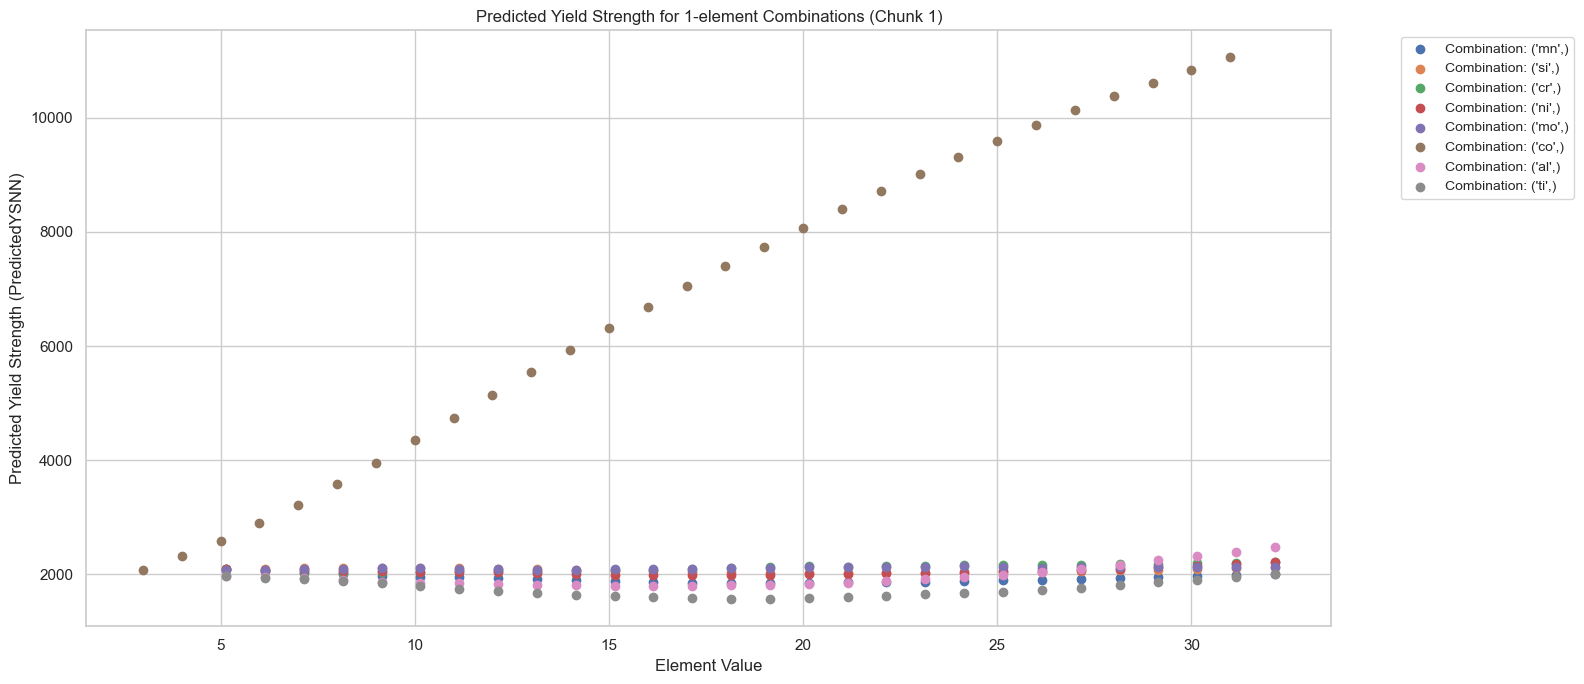

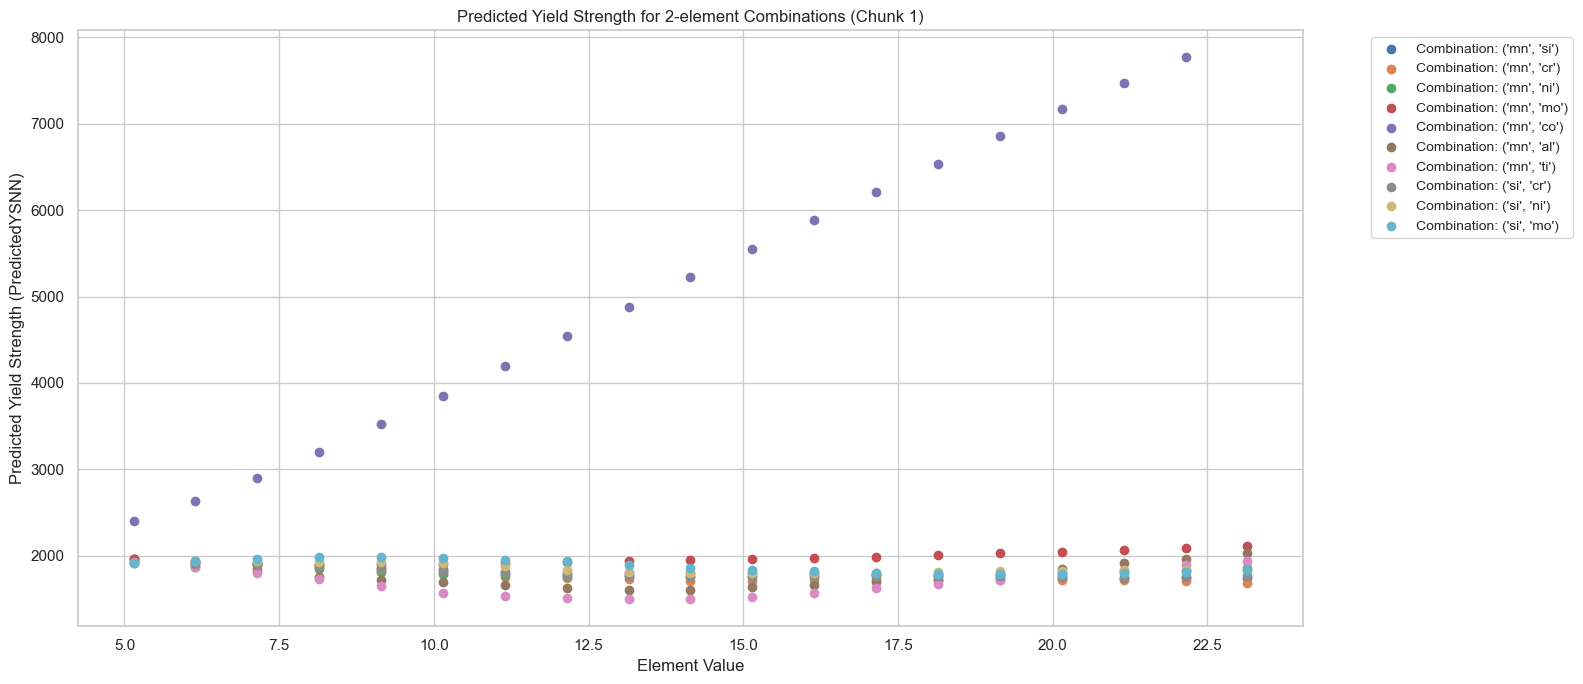

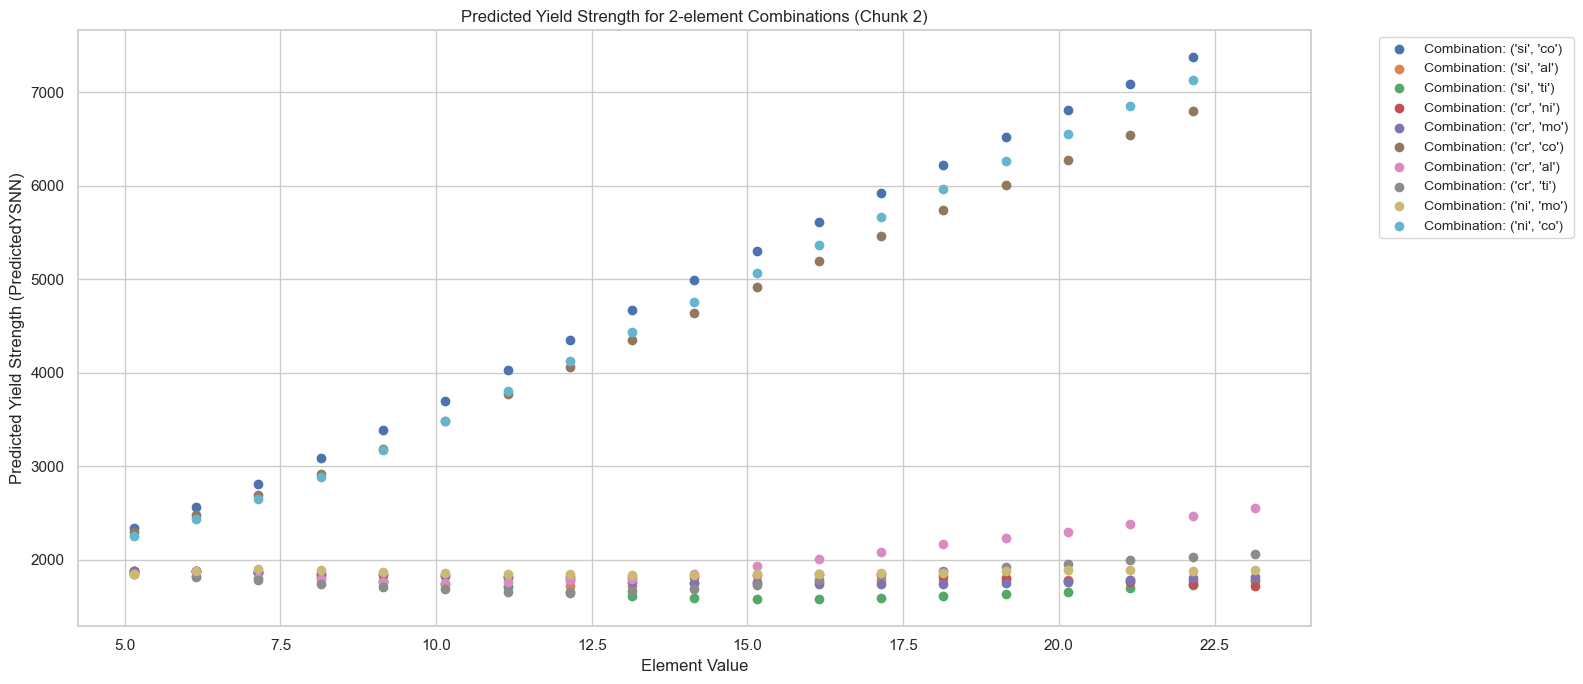

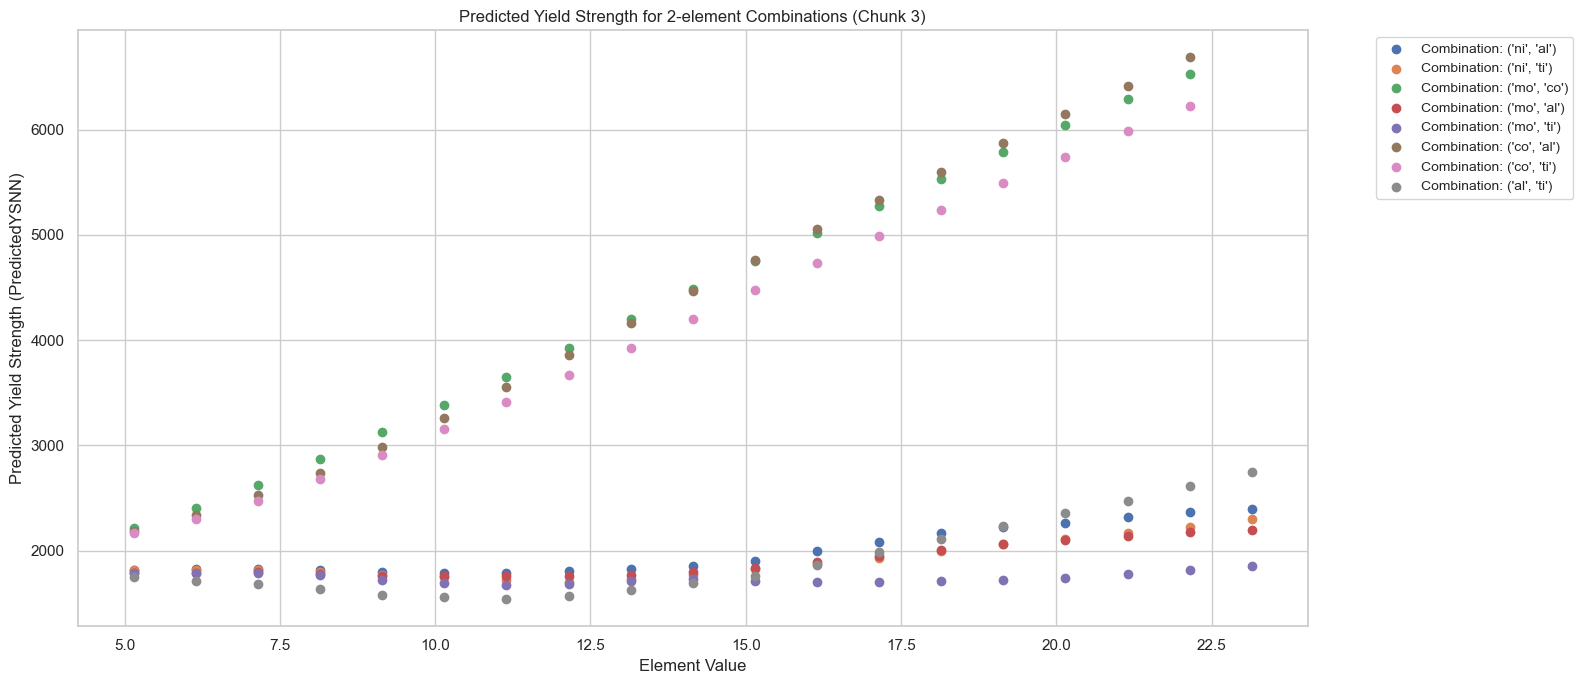

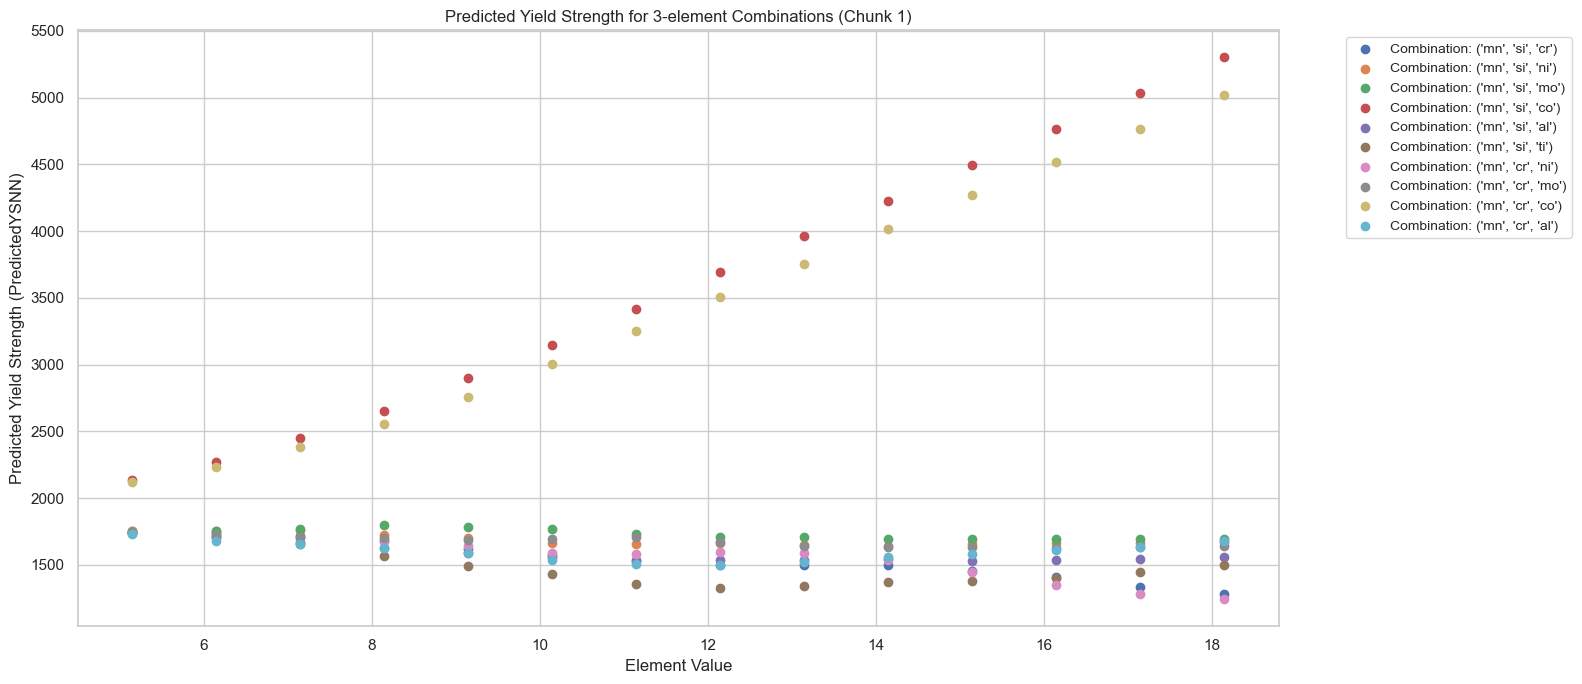

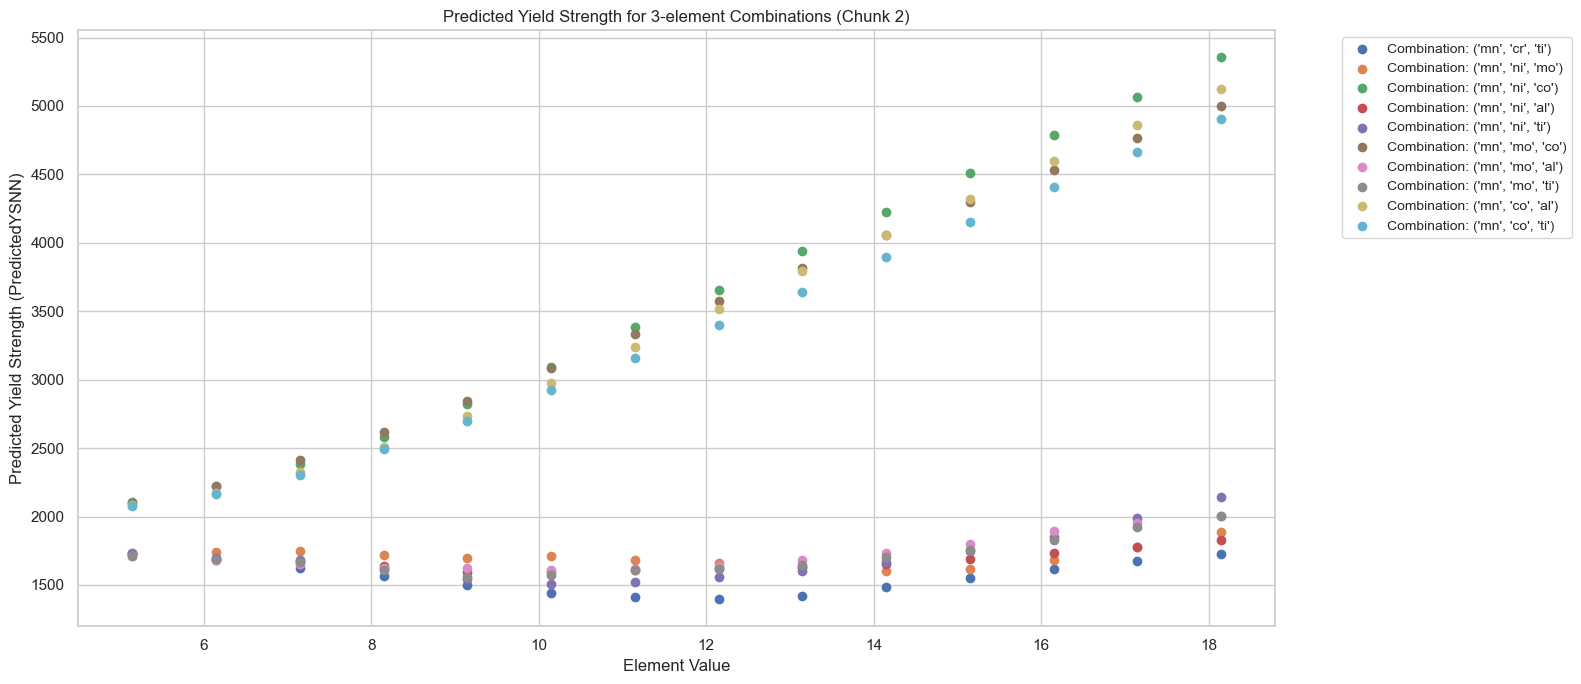

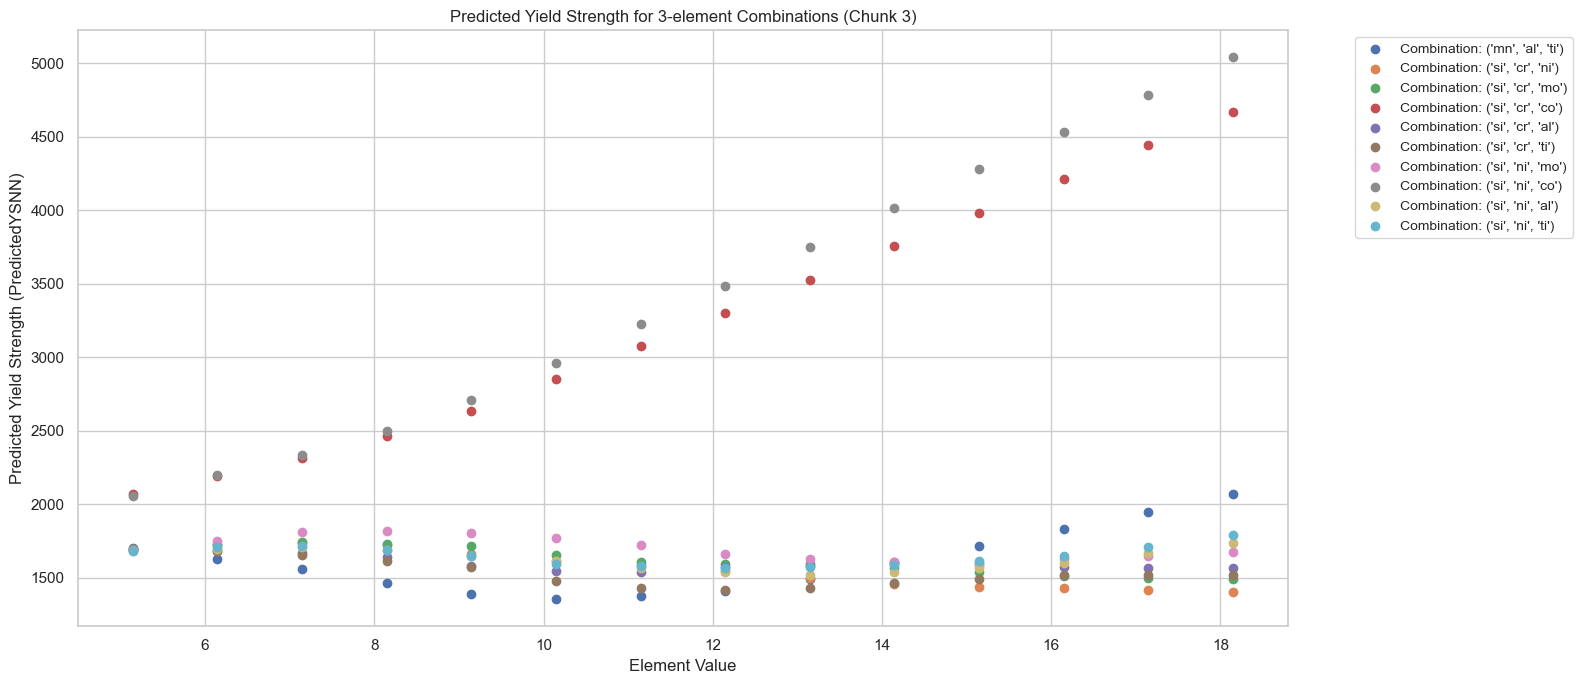

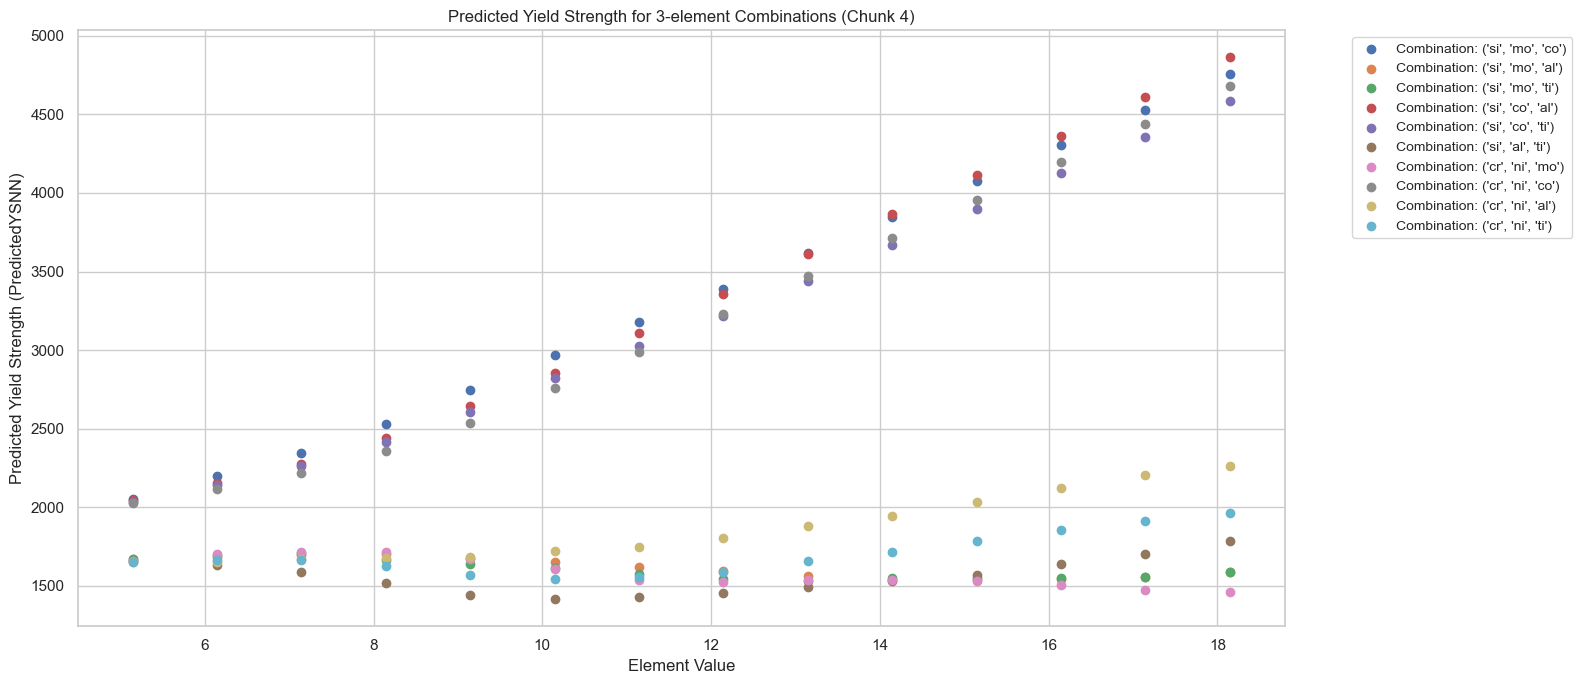

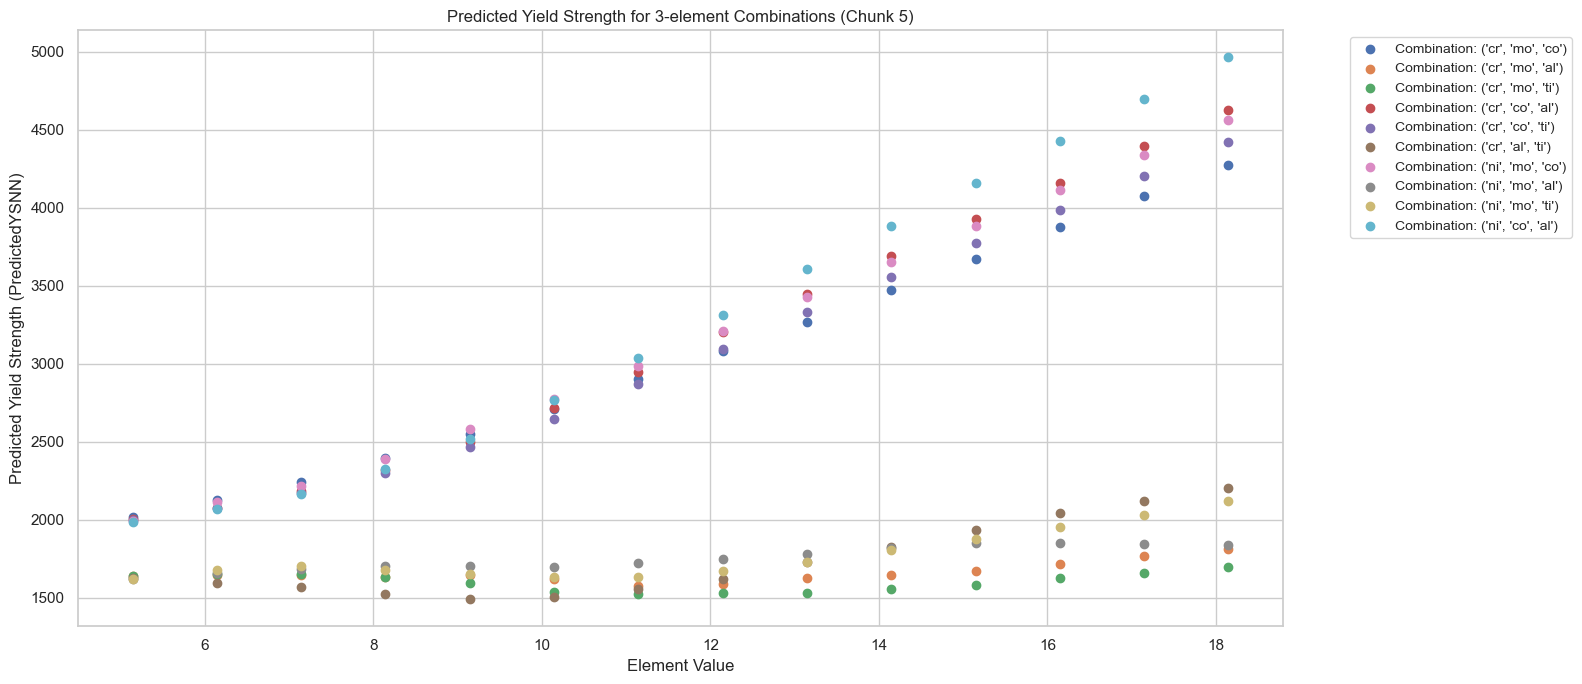

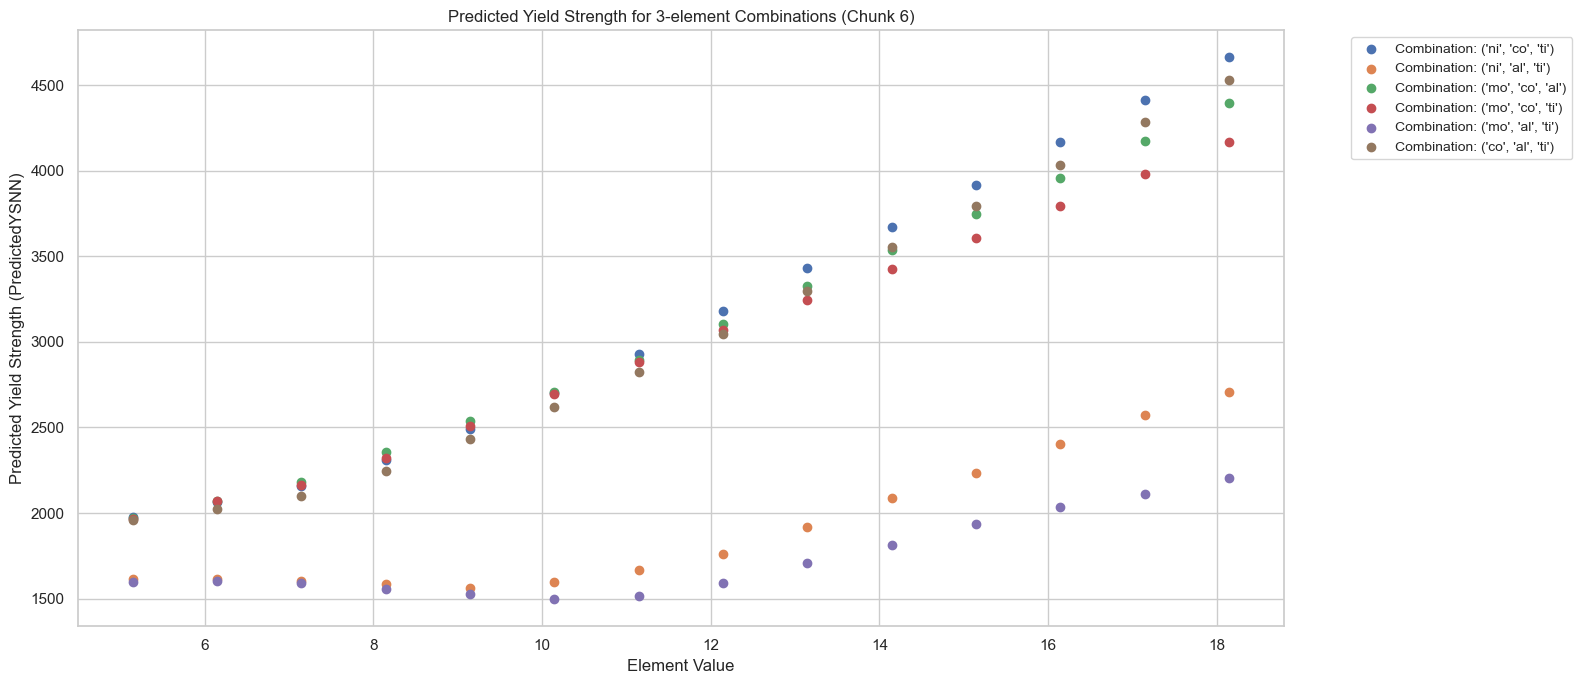

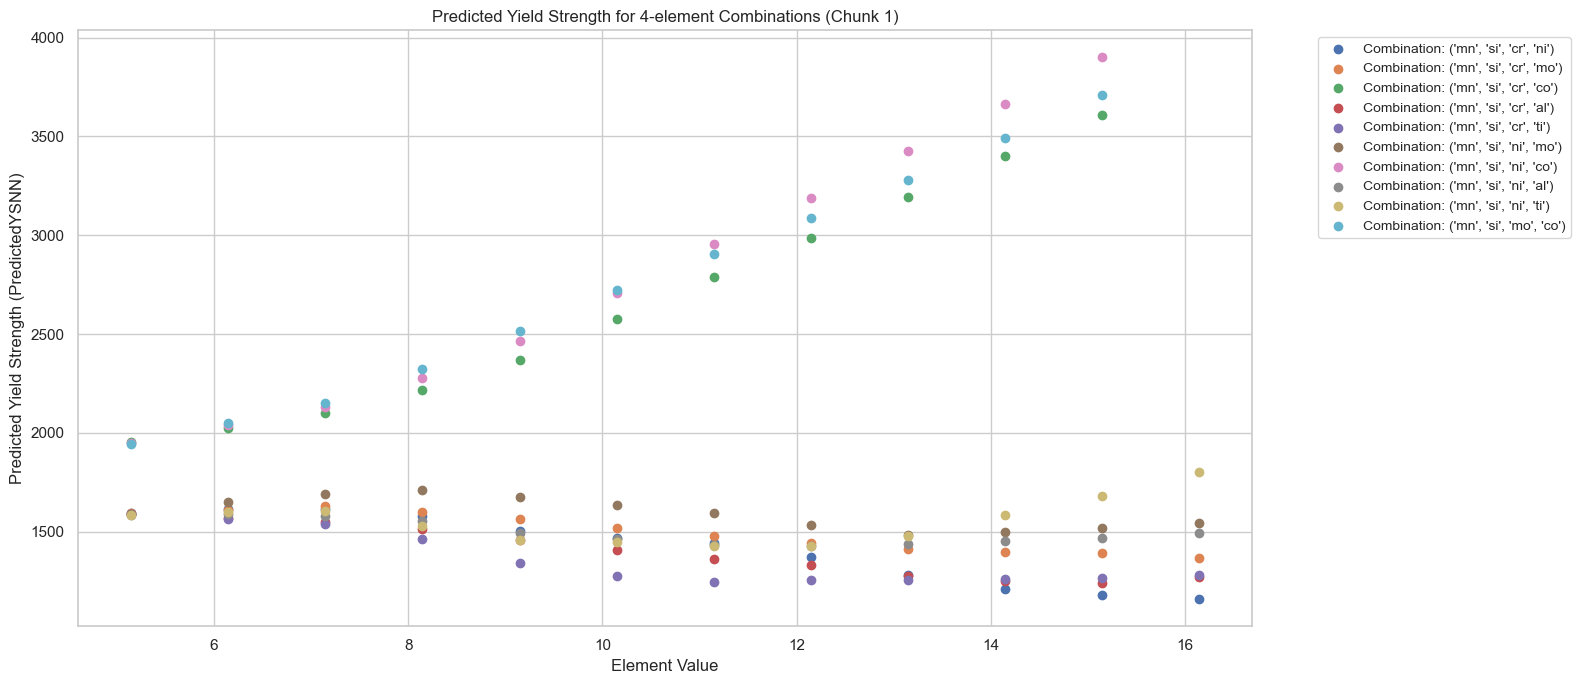

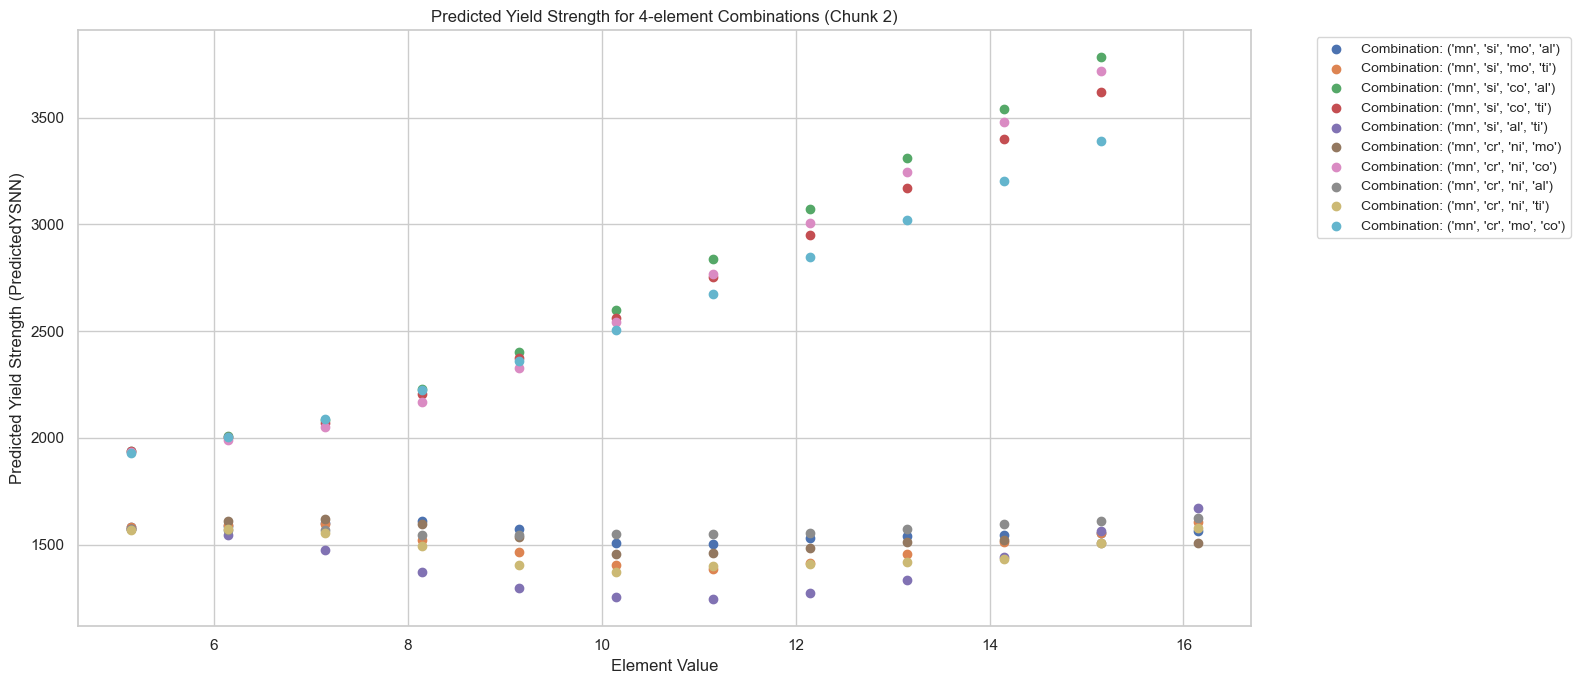

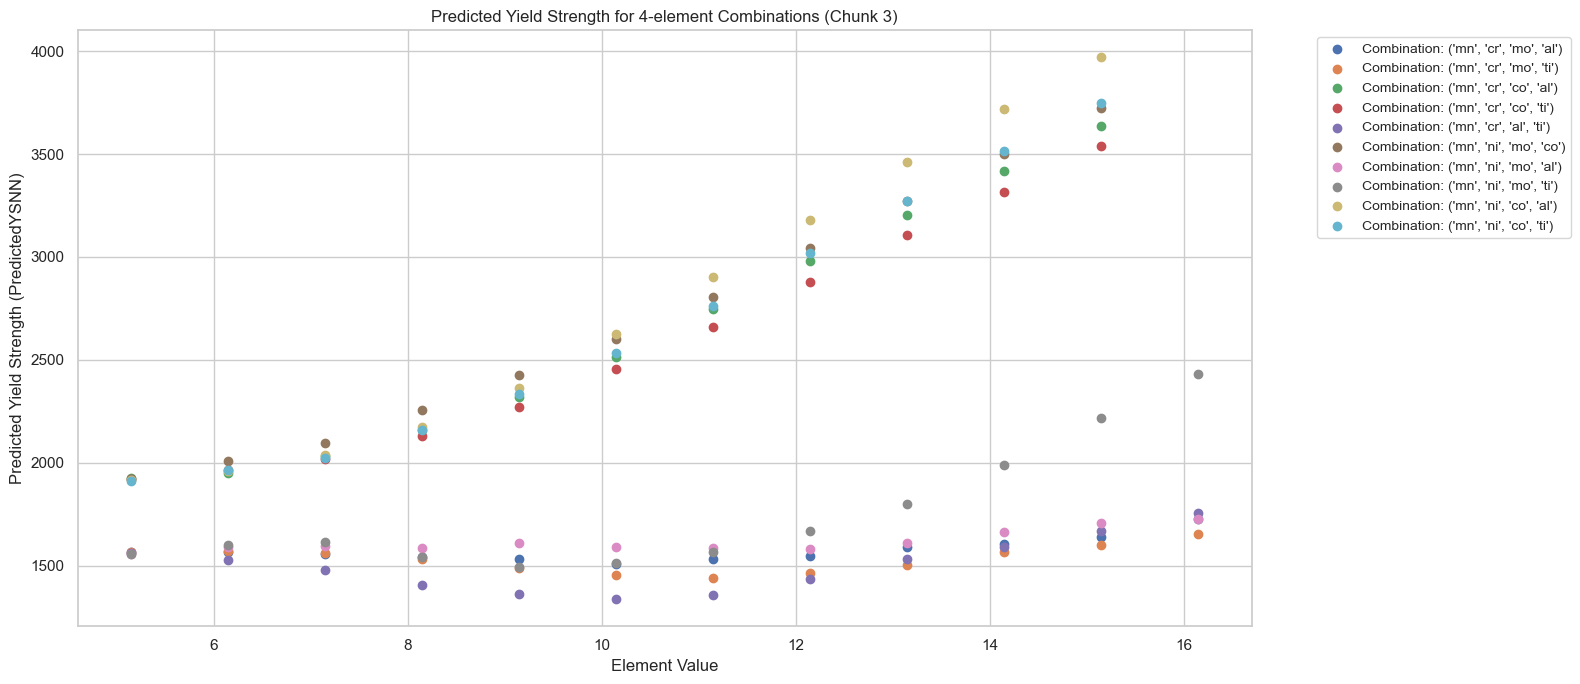

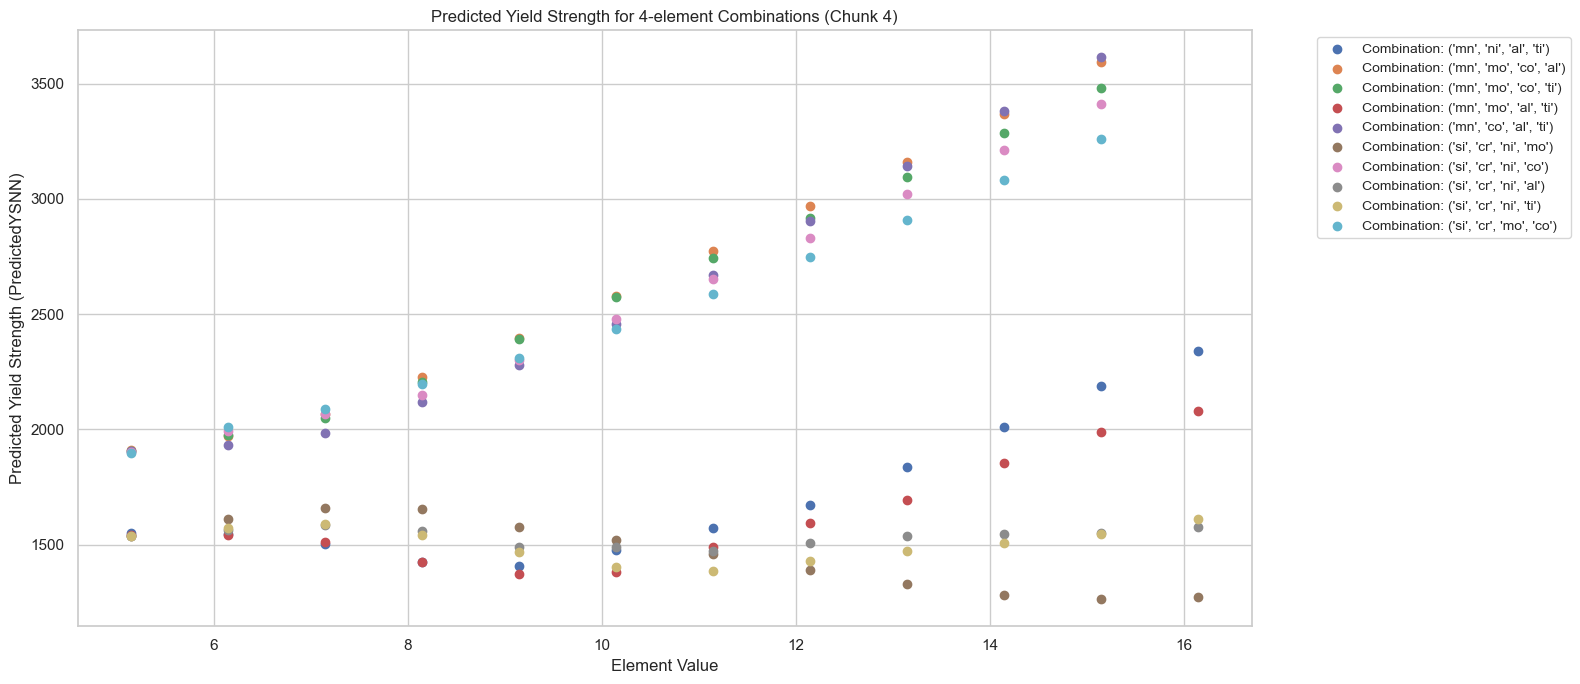

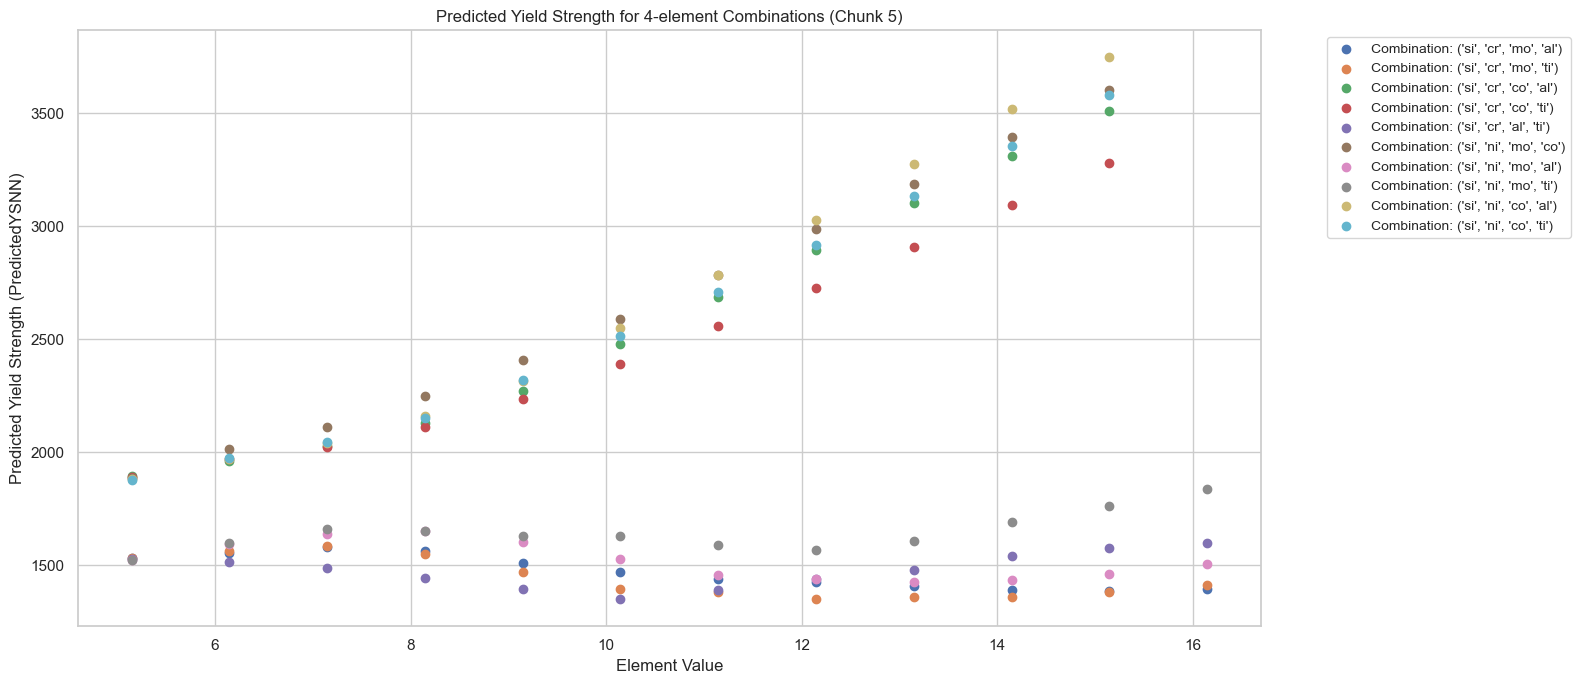

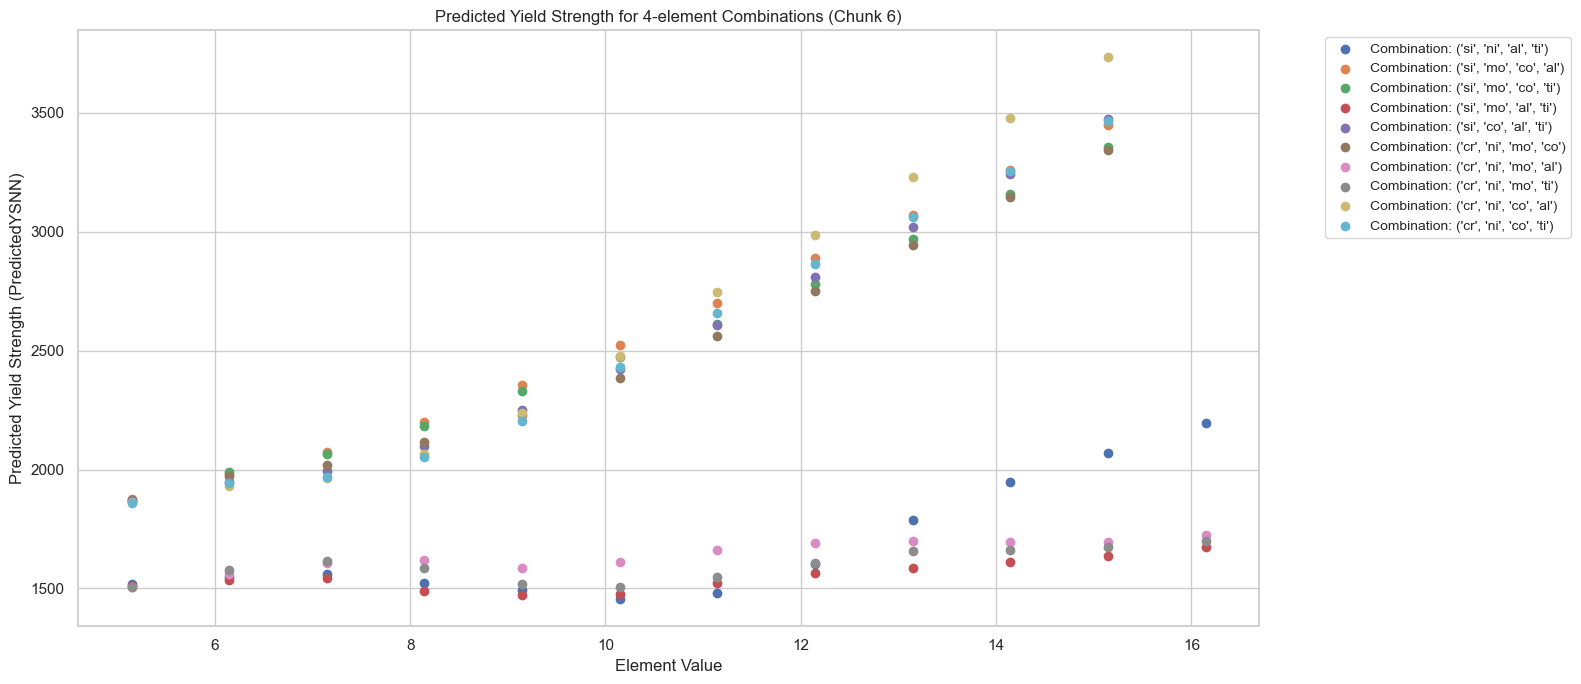

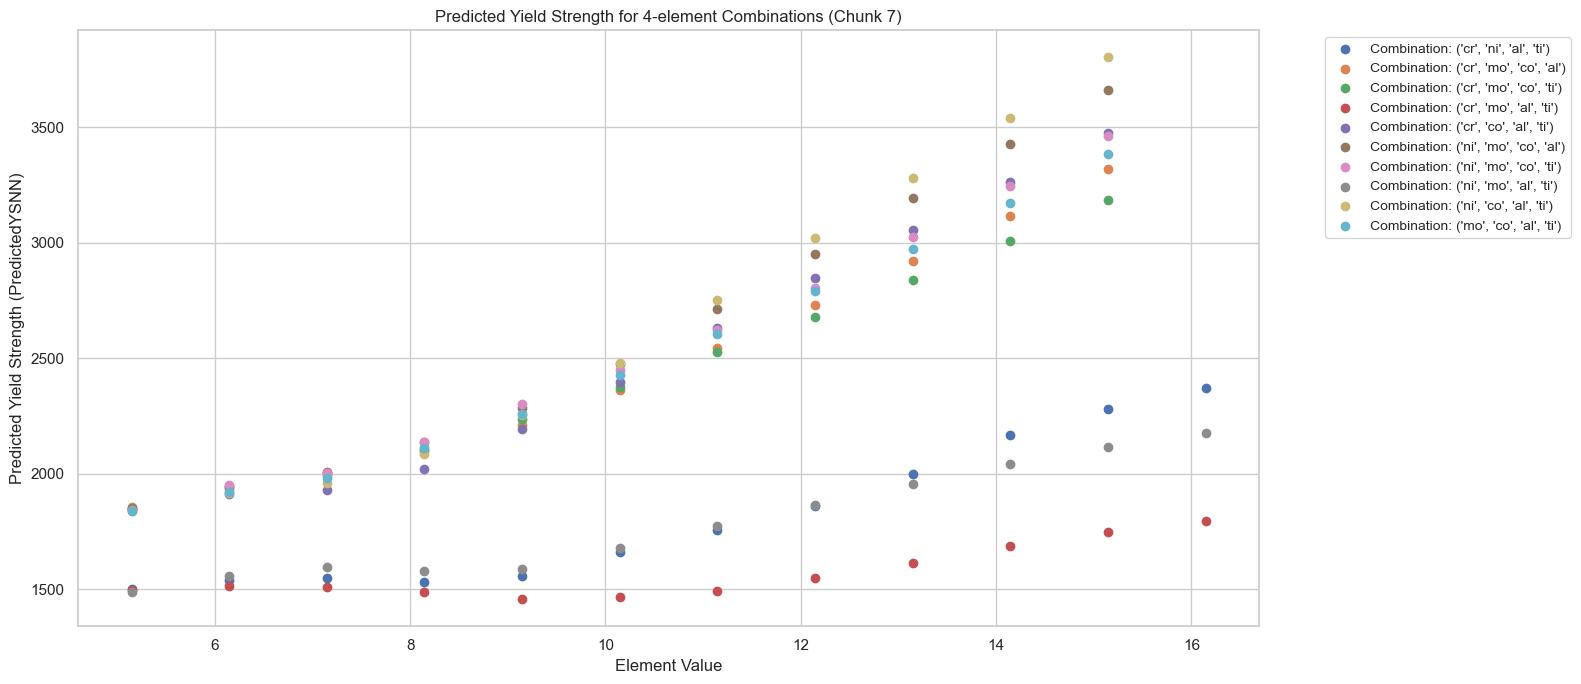

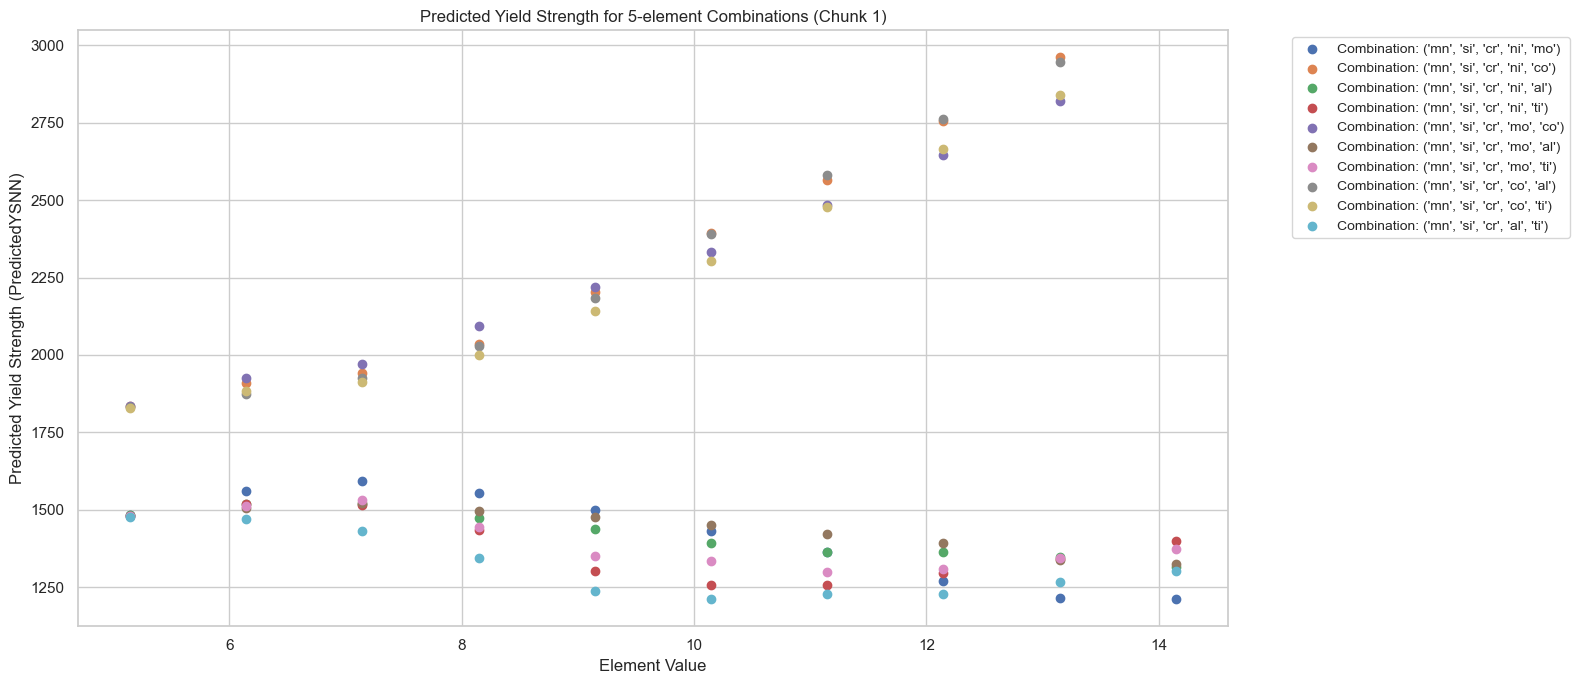

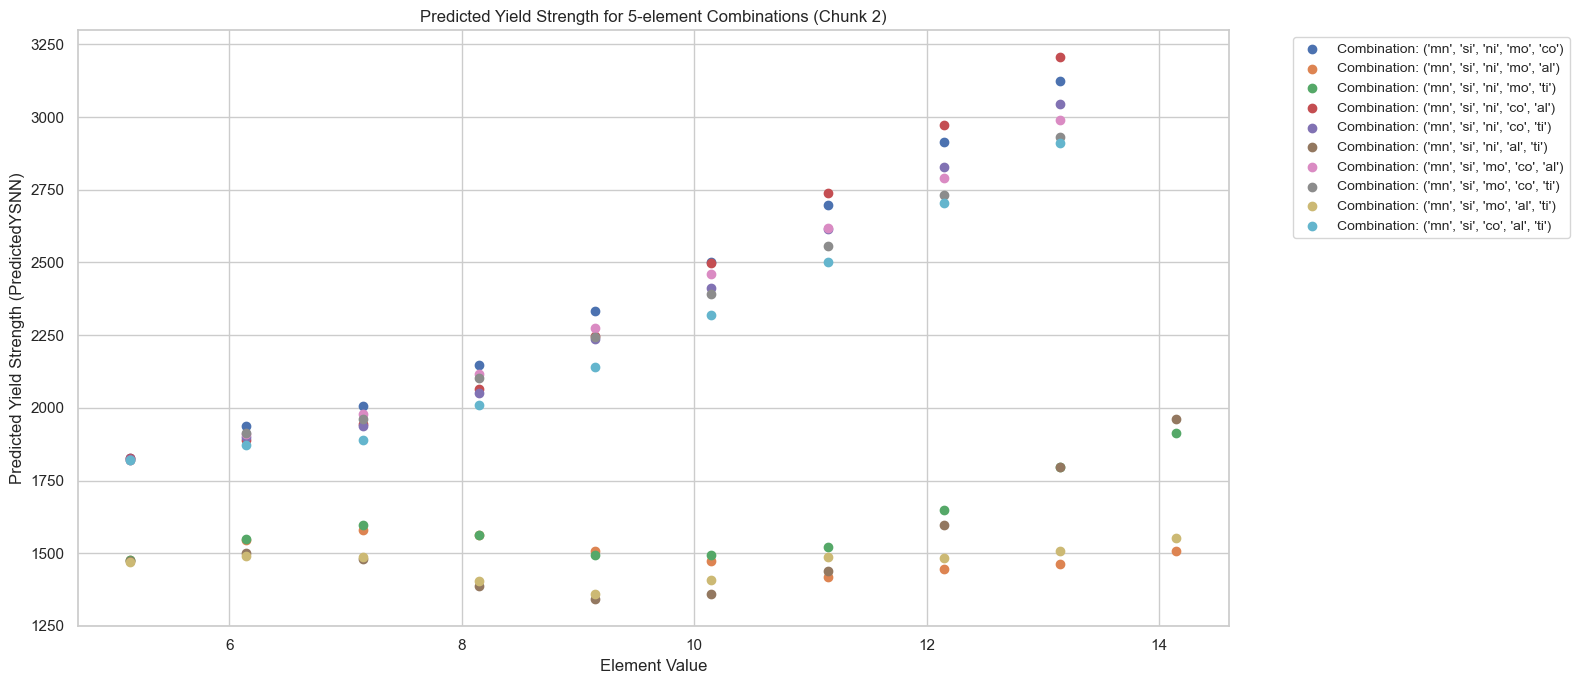

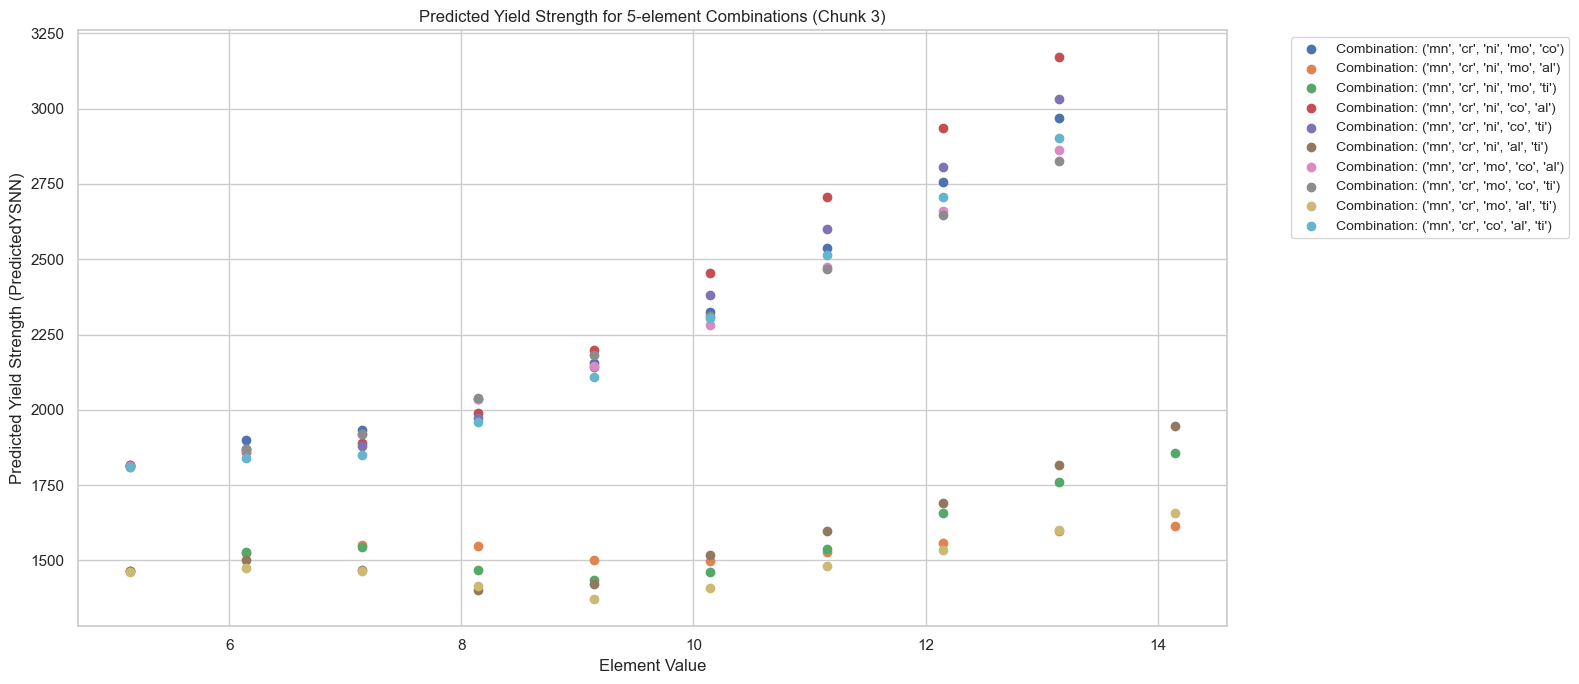

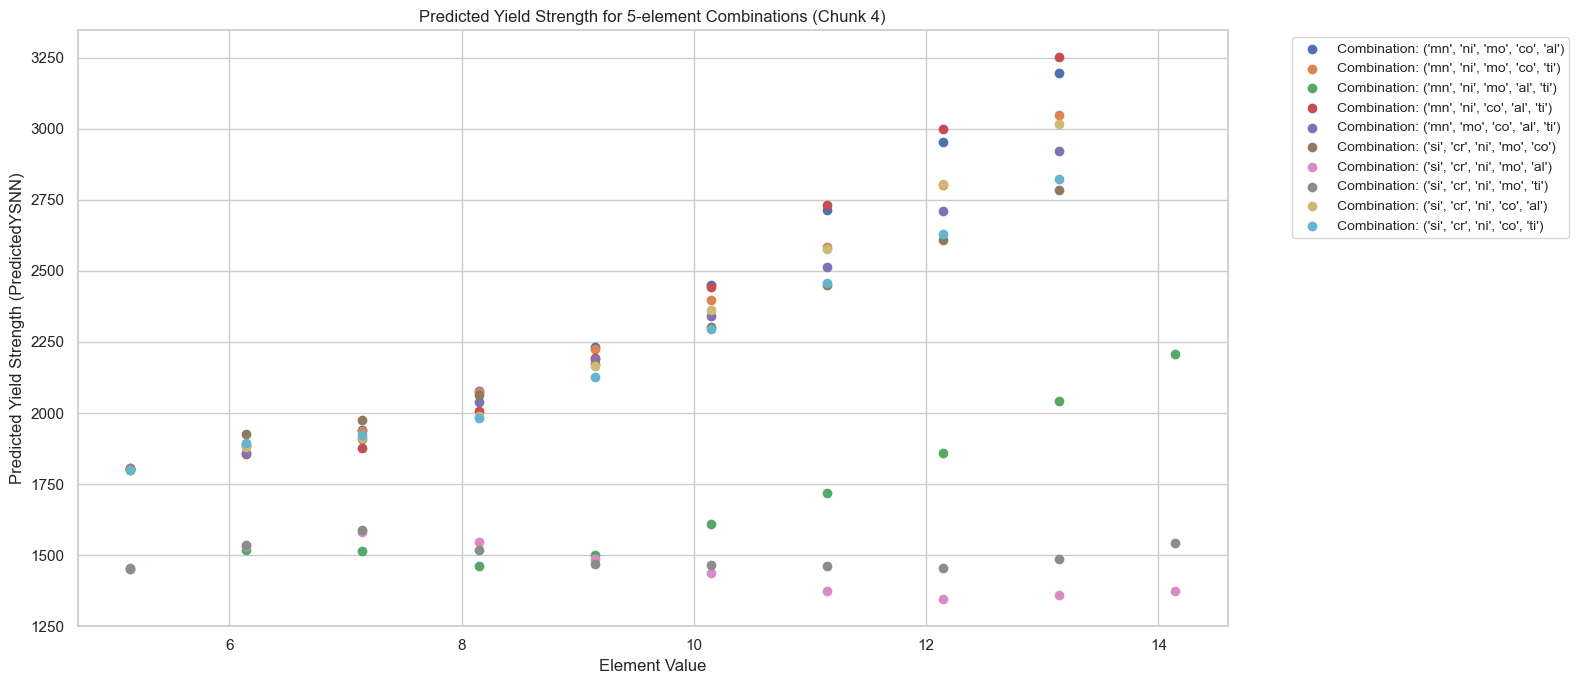

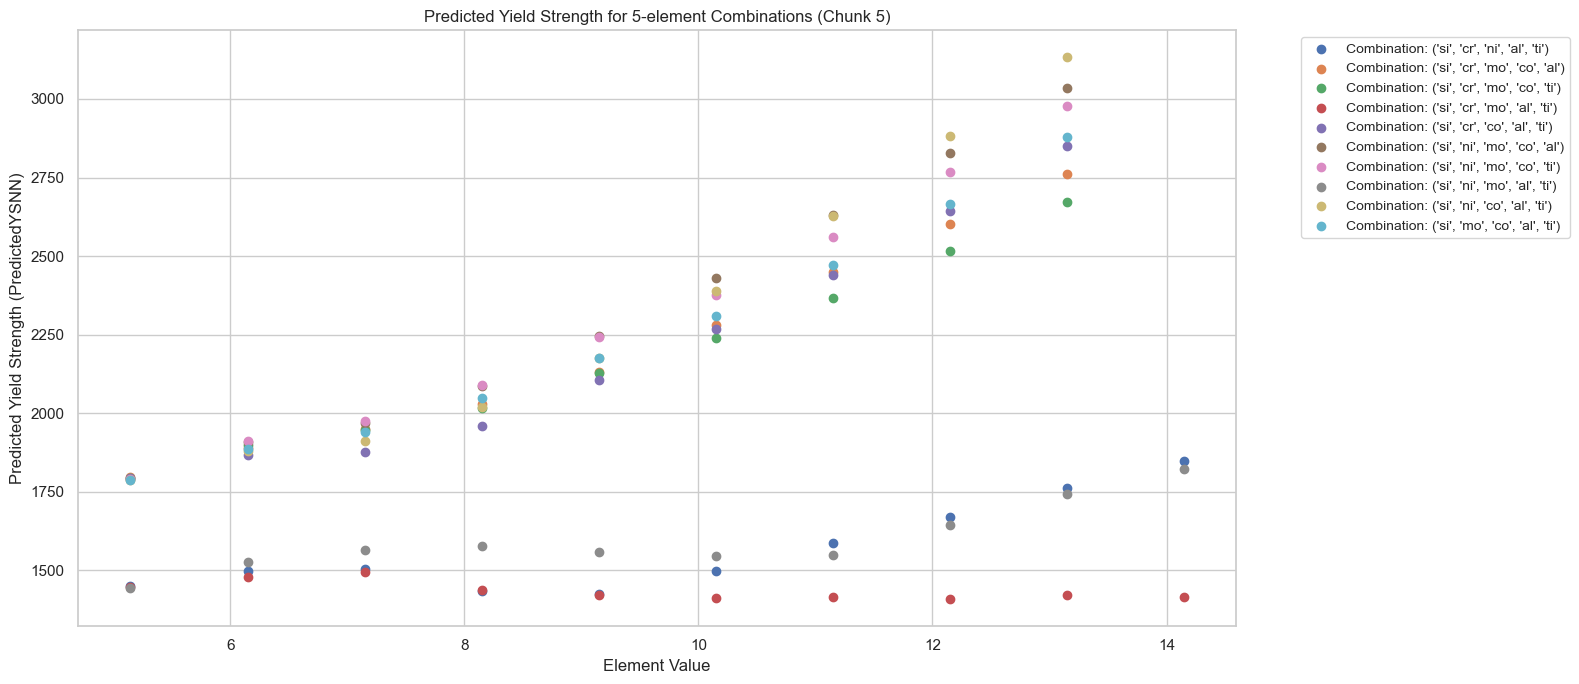

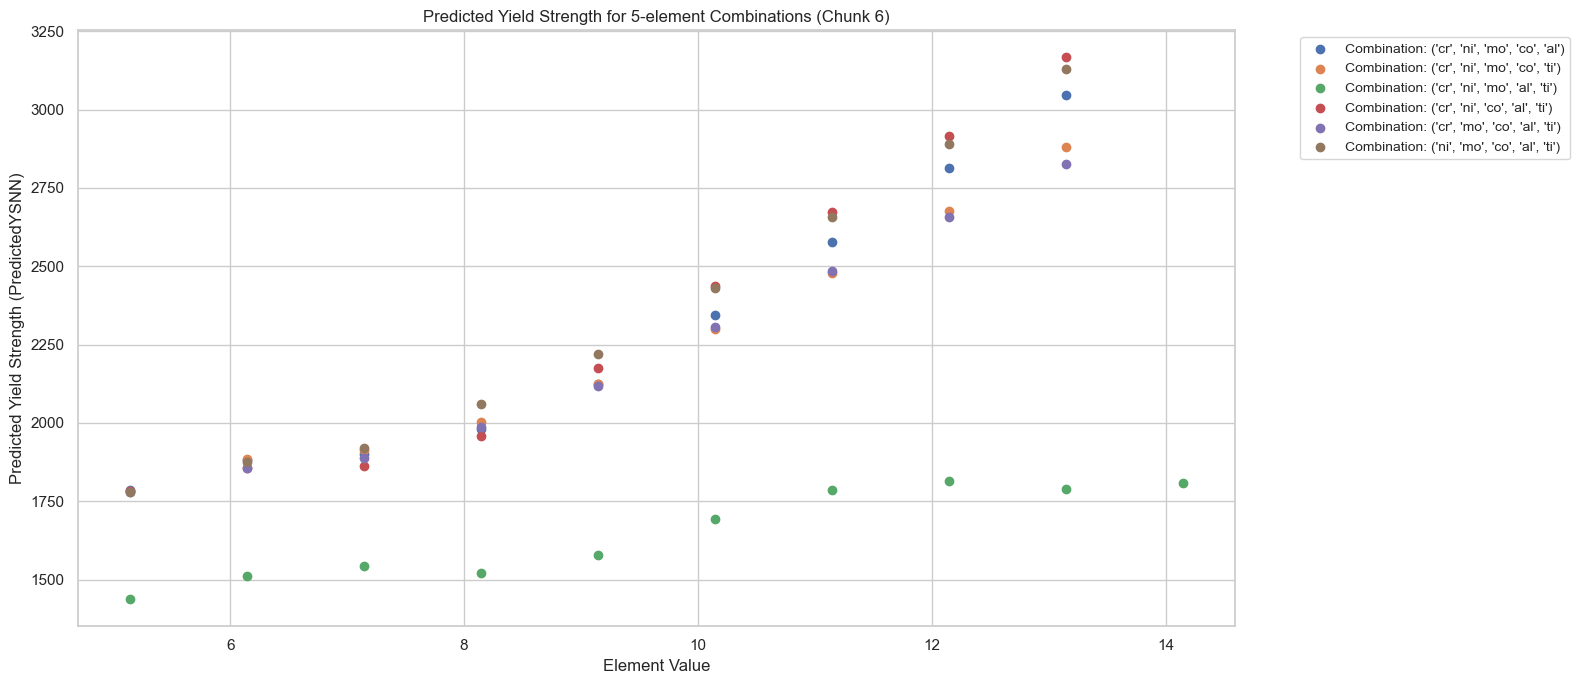

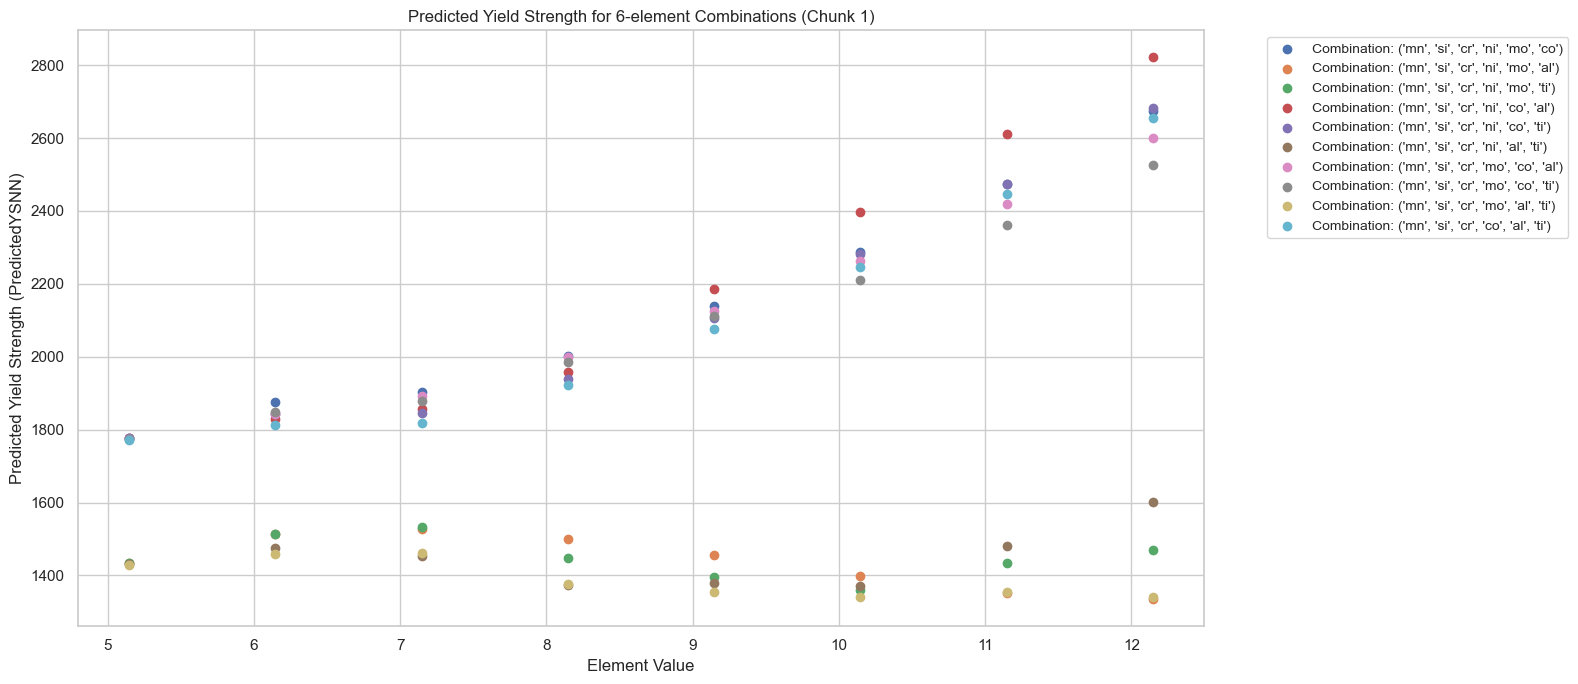

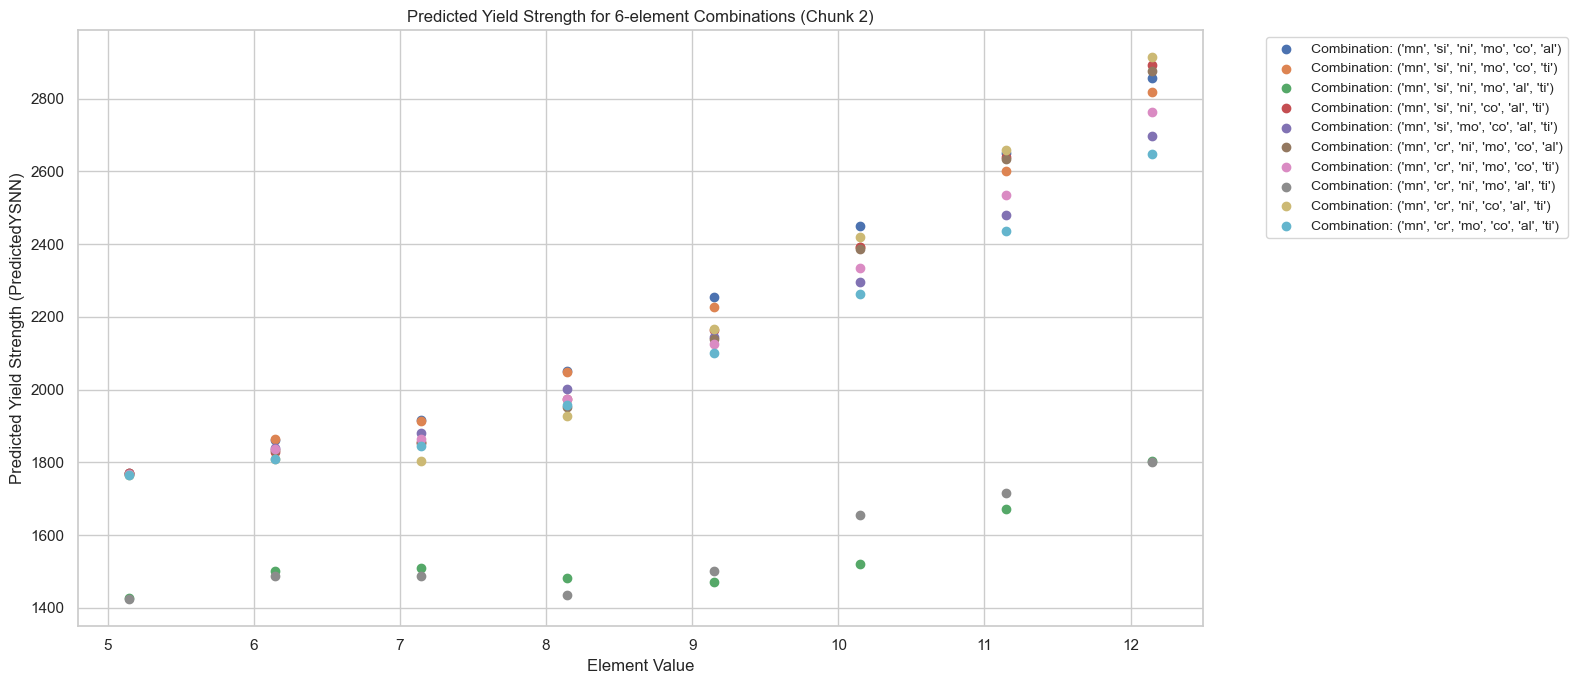

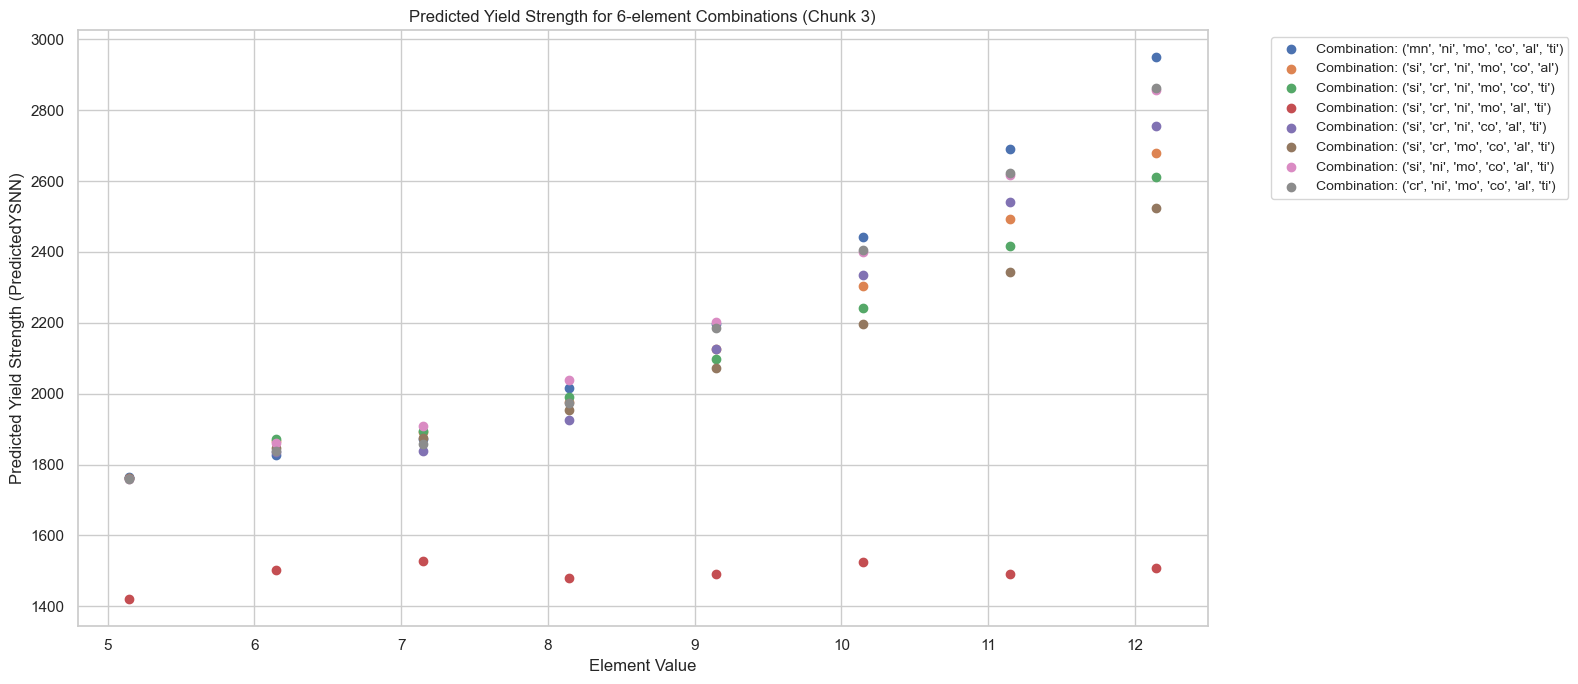

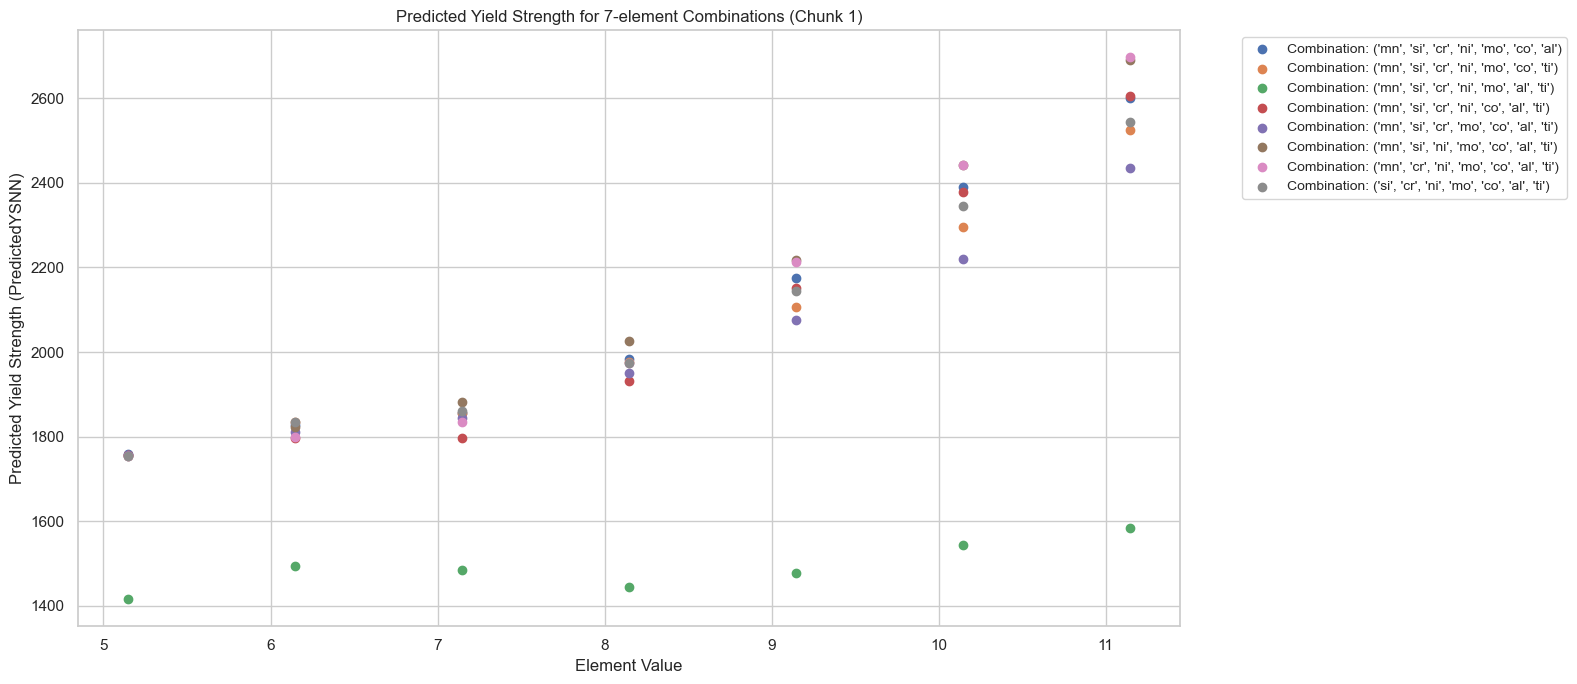

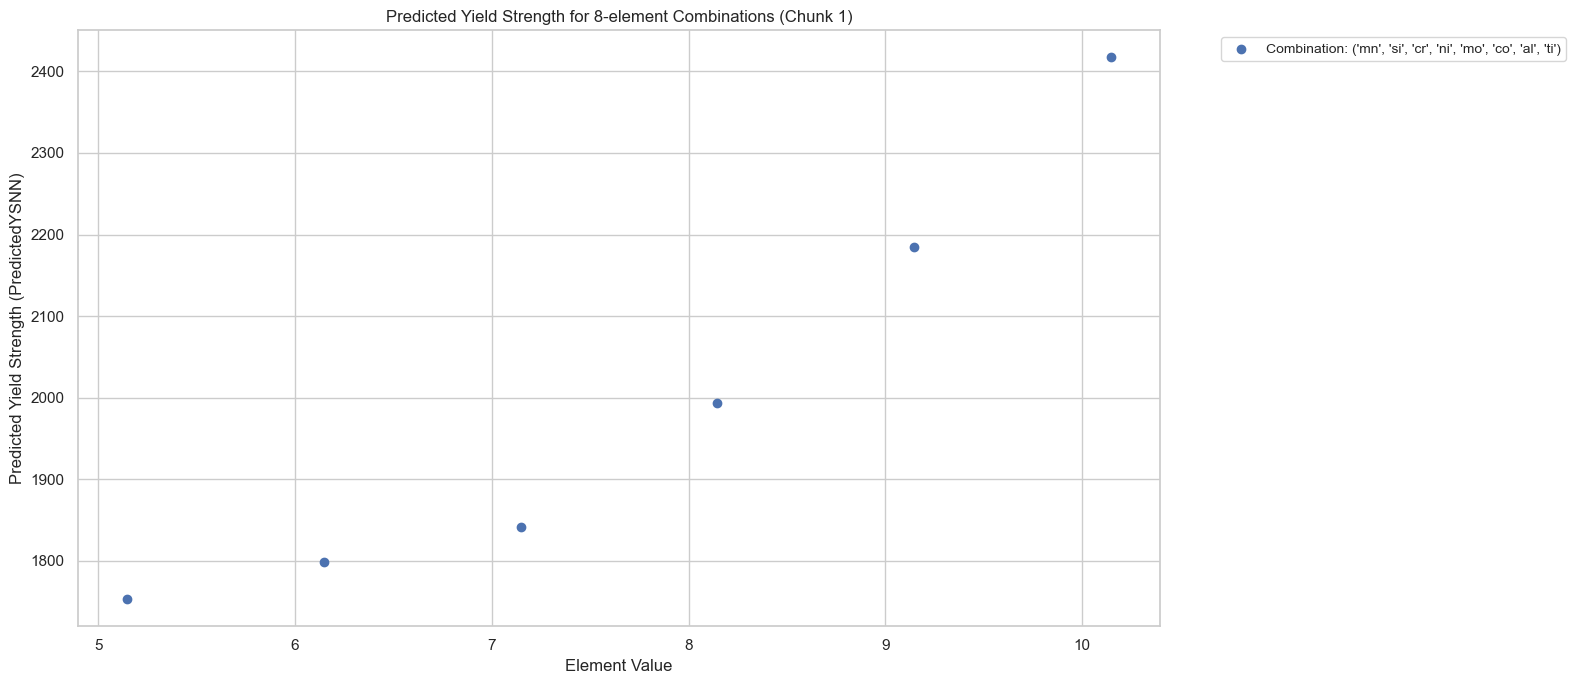

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
data = pd.read_csv('custom_chunk_8_with_predictions.csv')

# Find unique combinations of elements in the dataset
unique_combinations = data['combination'].unique()

# Create a dictionary to store datasets categorized by the number of elements in the combination
split_data = {combo: data[data['combination'] == combo] for combo in unique_combinations}

# List of specific elements you're interested in
target_elements = ['mn', 'si', 'cr', 'ni','co', 'mo', 'al', 'ti']

# Function to check if a combination contains only the target elements
def is_subset_of_target(combo, target_elements):
    elements_in_combo = eval(combo)  # Convert the string representation back to a tuple
    return set(elements_in_combo).issubset(set(target_elements))

# Filter the combinations that contain only the target elements
filtered_combinations = {
    combo: df for combo, df in split_data.items() if is_subset_of_target(combo, target_elements)
}

# Organize combinations based on the number of elements in each combination
grouped_by_count = defaultdict(list)

for combo, df in filtered_combinations.items():
    elements_in_combo = eval(combo)
    count = len(elements_in_combo)
    grouped_by_count[count].append((combo, df))

# Plotting separate scatter plots for each combination count (1 to 7 elements)
colors_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Default color cycle (10 colors)

for count in range(1, 9):  # Loop through 1 element to 8 element combinations
    if count in grouped_by_count:
        # Break combinations into chunks of 10 to match the color cycle
        for chunk_idx in range(0, len(grouped_by_count[count]), len(colors_cycle)):
            plt.figure(figsize=(16, 7))
            
            chunk = grouped_by_count[count][chunk_idx:chunk_idx + len(colors_cycle)]
            
            for i, (combo, df) in enumerate(chunk):
                # Use a unique color for each combination within the current chunk
                plt.scatter(df['value'], df['PredictedYSNN'], label=f'Combination: {combo}', color=colors_cycle[i])
            
            # Customize the plot
            plt.xlabel('Element Value')
            plt.ylabel('Predicted Yield Strength (PredictedYSNN)')
            plt.title(f'Predicted Yield Strength for {count}-element Combinations (Chunk {chunk_idx // len(colors_cycle) + 1})')
            plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
            plt.tight_layout()

            # Save the figure as an image file
            plt.savefig(f'predicted_ys_{count}_elements_chunk_{chunk_idx // len(colors_cycle) + 1}.png')  # Save each plot as a PNG file

            plt.show()
